# Preparación del modelo

## Importación de librerías

In [149]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import seaborn as sns

# Carga de datos

## Geodataframe

In [150]:
agebs = gpd.read_file('data/colima/agebs.gpkg')
agebs_proceso = agebs.copy()
agebs["area"] = agebs.area / 1000 # ha
agebs.drop(columns=["CVE_ENT","CVE_MUN", "CVE_AGEB","CVE_LOC","geometry"], inplace=True)
agebs = pd.DataFrame(agebs)

## Zonal Statistics

In [151]:
df0 = pd.read_csv('data/megaGDF.csv')
df0.drop(columns=["CVE_ENT","CVE_MUN","CVE_LOC", "_count","_sum"], inplace=True)
df0.head()

CVEGEO CVE_AGEB  _mean  class  time
0  0600200010676     0676    NaN  Depth     0
1  0600200010727     0727    NaN  Depth     0
2  0600200011142     1142    NaN  Depth     0
3  0600200010411     0411    NaN  Depth     0
4  0600200011068     1068    NaN  Depth     0

In [152]:
df = df0.pivot_table(index=["CVEGEO",'CVE_AGEB',"time"], columns='class', values=["_mean"])
df.reset_index(inplace=True)
# remove double header
df.columns = df.columns.droplevel(0)
df.columns = ['CVEGEO', 'CVE_AGEB',"time", 'Depth', 'Rain', 'Velocity']
df

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity
0     0600200010318     0318      0       NaN  0.00       NaN
1     0600200010318     0318    300       NaN  0.00       NaN
2     0600200010318     0318    600       NaN  0.72       NaN
3     0600200010318     0318    900       NaN  0.72       NaN
4     0600200010318     0318   1200       NaN  1.38       NaN
...             ...      ...    ...       ...   ...       ...
2123  0601000010362     0362  23100  0.016889  4.80  0.070683
2124  0601000010362     0362  23400  0.016851  8.76  0.070517
2125  0601000010362     0362  23700  0.016796  8.76  0.070501
2126  0601000010362     0362  24000  0.016748  7.80  0.070419
2127  0601000010362     0362  24300  0.021053   NaN       NaN

[2128 rows x 6 columns]

In [153]:
df = df.merge(agebs, on="CVEGEO")
df

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area
0     0600200010318     0318      0       NaN  0.00       NaN  339.556144
1     0600200010318     0318    300       NaN  0.00       NaN  339.556144
2     0600200010318     0318    600       NaN  0.72       NaN  339.556144
3     0600200010318     0318    900       NaN  0.72       NaN  339.556144
4     0600200010318     0318   1200       NaN  1.38       NaN  339.556144
...             ...      ...    ...       ...   ...       ...         ...
2123  0601000010362     0362  23100  0.016889  4.80  0.070683  227.156848
2124  0601000010362     0362  23400  0.016851  8.76  0.070517  227.156848
2125  0601000010362     0362  23700  0.016796  8.76  0.070501  227.156848
2126  0601000010362     0362  24000  0.016748  7.80  0.070419  227.156848
2127  0601000010362     0362  24300  0.021053   NaN       NaN  227.156848

[2128 rows x 7 columns]

## Denue and INV

In [154]:
denue_inv = pd.read_csv('data/denue_inv.csv')
denue_inv.head()

CVE_AGEB  POBTOT  POB0_14_P  P15A29A_P  P30A59A_P   GRAPROES    P_CD_P  \
0     0273      74   6.349231   7.081538  13.980769   3.403077  3.540769   
1     0318    1925  11.397551  17.568980  31.385102  10.333878  7.330000   
2     0322    2143  11.647736  17.747170  30.118113  11.442453  7.085472   
3     0362    2342  18.422286  21.292000  33.820000   9.617714  5.100857   
4     0411    1116   9.866053  17.035000  33.167105  11.912895  4.348947   

   VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  PARATRAN_C  DRENAJEP_C  \
0   30.769231   29.486923   30.769231  ...    3.000000    3.000000   
1   85.303878   85.473878   85.473878  ...    2.918367    2.612245   
2   88.486038   88.553396   88.553396  ...    2.924528    2.830189   
3   91.145714   91.380857   91.380857  ...    2.942857    2.914286   
4   81.578947   81.578947   81.578947  ...    2.973684    2.947368   

   TRANSCOL_C  ARBOLES_C  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C  escuela  \
0    2.923077   2.384615    3.000000    3.000000    3.000000      1.0   
1    2.346939   1.653061    2.938776    2.979592    2.918367     13.0   
2    2.716981   1.320755    3.000000    2.924528    2.849057     13.0   
3    2.771429   1.285714    3.000000    2.914286    2.914286      4.0   
4    2.868421   1.736842    1.236842    2.973684    2.921053     12.0   

   farmacia  hospital  
0       0.0       0.0  
1       6.0       0.0  
2       3.0       3.0  
3       1.0       1.0  
4       2.0       0.0  

[5 rows x 28 columns]

## Join

In [155]:
df_full = df.merge(denue_inv, on="CVE_AGEB")
df_full

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
0     0600200010318     0318      0       NaN  0.00       NaN  339.556144   
1     0600200010318     0318    300       NaN  0.00       NaN  339.556144   
2     0600200010318     0318    600       NaN  0.72       NaN  339.556144   
3     0600200010318     0318    900       NaN  0.72       NaN  339.556144   
4     0600200010318     0318   1200       NaN  1.38       NaN  339.556144   
...             ...      ...    ...       ...   ...       ...         ...   
2123  0601000010362     0362  23100  0.016889  4.80  0.070683  227.156848   
2124  0601000010362     0362  23400  0.016851  8.76  0.070517  227.156848   
2125  0601000010362     0362  23700  0.016796  8.76  0.070501  227.156848   
2126  0601000010362     0362  24000  0.016748  7.80  0.070419  227.156848   
2127  0601000010362     0362  24300  0.021053   NaN       NaN  227.156848   

      POBTOT  POB0_14_P  P15A29A_P  ...  PARATRAN_C  DRENAJEP_C  TRANSCOL_C  \
0       1925  11.397551   17.56898  ...    2.918367    2.612245    2.346939   
1       1925  11.397551   17.56898  ...    2.918367    2.612245    2.346939   
2       1925  11.397551   17.56898  ...    2.918367    2.612245    2.346939   
3       1925  11.397551   17.56898  ...    2.918367    2.612245    2.346939   
4       1925  11.397551   17.56898  ...    2.918367    2.612245    2.346939   
...      ...        ...        ...  ...         ...         ...         ...   
2123    2342  18.422286   21.29200  ...    2.942857    2.914286    2.771429   
2124    2342  18.422286   21.29200  ...    2.942857    2.914286    2.771429   
2125    2342  18.422286   21.29200  ...    2.942857    2.914286    2.771429   
2126    2342  18.422286   21.29200  ...    2.942857    2.914286    2.771429   
2127    2342  18.422286   21.29200  ...    2.942857    2.914286    2.771429   

      ARBOLES_C  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C  escuela  farmacia  \
0      1.653061    2.938776    2.979592    2.918367     13.0       6.0   
1      1.653061    2.938776    2.979592    2.918367     13.0       6.0   
2      1.653061    2.938776    2.979592    2.918367     13.0       6.0   
3      1.653061    2.938776    2.979592    2.918367     13.0       6.0   
4      1.653061    2.938776    2.979592    2.918367     13.0       6.0   
...         ...         ...         ...         ...      ...       ...   
2123   1.285714    3.000000    2.914286    2.914286      4.0       1.0   
2124   1.285714    3.000000    2.914286    2.914286      4.0       1.0   
2125   1.285714    3.000000    2.914286    2.914286      4.0       1.0   
2126   1.285714    3.000000    2.914286    2.914286      4.0       1.0   
2127   1.285714    3.000000    2.914286    2.914286      4.0       1.0   

      hospital  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
2123       1.0  
2124       1.0  
2125       1.0  
2126       1.0  
2127       1.0  

[2128 rows x 34 columns]

In [156]:
df_full.sort_values(by=["time"], inplace=True)
df_full

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
0     0600200010318     0318      0       NaN   0.0       NaN  339.556144   
245   0600200010676     0676      0       NaN   0.0       NaN  381.991619   
327   0600200010680     0680      0       NaN   0.0       NaN  315.090313   
409   0600200010708     0708      0       NaN   0.0       NaN  314.927699   
490   0600200010712     0712      0       NaN   0.0       NaN  417.701078   
...             ...      ...    ...       ...   ...       ...         ...   
1963  0600200011458     1458  24300  0.047361   NaN       NaN  205.589137   
653   0600200010727     0727  24300  0.075082   NaN       NaN  656.062487   
735   0600200010731     0731  24300  0.088734   NaN       NaN  357.631414   
1390  0600200011068     1068  24300  0.142666   NaN       NaN  715.165608   
2127  0601000010362     0362  24300  0.021053   NaN       NaN  227.156848   

      POBTOT  POB0_14_P  P15A29A_P  ...  PARATRAN_C  DRENAJEP_C  TRANSCOL_C  \
0       1925  11.397551  17.568980  ...    2.918367    2.612245    2.346939   
245     2119  18.954194  19.591290  ...    2.935484    2.709677    2.806452   
327     1467  10.623214  20.527500  ...    2.892857    2.928571    2.392857   
409     1086   9.315185  16.823333  ...    2.851852    2.185185    2.666667   
490     2482  12.117353  21.365588  ...    2.941176    2.000000    2.529412   
...      ...        ...        ...  ...         ...         ...         ...   
1963    2076  16.024412  17.380588  ...    2.941176    2.911765    2.735294   
653     4375  15.677234  19.972128  ...    2.851064    2.872340    2.468085   
735     2350  13.676977  19.811395  ...    2.930233    2.697674    2.813953   
1390    1974  15.855957  21.856170  ...    3.000000    3.000000    2.638298   
2127    2342  18.422286  21.292000  ...    2.942857    2.914286    2.771429   

      ARBOLES_C  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C  escuela  farmacia  \
0      1.653061    2.938776    2.979592    2.918367     13.0       6.0   
245    1.451613    3.000000    2.838710    2.935484      9.0       1.0   
327    1.464286    3.000000    3.000000    2.857143     12.0       2.0   
409    1.555556    3.000000    2.925926    2.888889     12.0       0.0   
490    1.705882    3.000000    3.000000    2.911765     11.0       3.0   
...         ...         ...         ...         ...      ...       ...   
1963   1.500000    3.000000    2.764706    2.882353      5.0       5.0   
653    1.425532    2.914894    2.936170    2.872340      3.0       4.0   
735    1.395349    3.000000    2.930233    2.930233      3.0       2.0   
1390   1.319149    1.106383    2.957447    2.957447      7.0       3.0   
2127   1.285714    3.000000    2.914286    2.914286      4.0       1.0   

      hospital  
0          0.0  
245        0.0  
327        1.0  
409        4.0  
490        1.0  
...        ...  
1963       1.0  
653        0.0  
735        0.0  
1390       0.0  
2127       1.0  

[2128 rows x 34 columns]

In [157]:
# Calcular la cantidad de agua acumulada por área durante la tormenta
df_full["acum_agua"] = df_full["Depth"] * df_full["area"]

df_proceso = df_full.copy()
df_visual = df_full.copy()

print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")

# Calcular el índice de riesgo basado en la cantidad de agua acumulada y la densidad poblacional
df_full["riesgo"] = np.where(df_full["POBTOT"] == 0, 0, df_full["acum_agua"] / df_full["POBTOT"])

(2128, 35) df_full
(2128, 35) df_proceso
(2128, 35) df_visual


In [158]:
list_area = ["POBTOT",'RECUCALL_C', 'RAMPAS_C', 'PASOPEAT_C',
       'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C', 'SEMAAUDI_C',
       'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C', 'ACESOAUT_C',
       'PUESSEMI_C', 'PUESAMBU_C', 'escuela', 'farmacia', 'hospital']

for i in list_area:
    df_full[i] = df_full[i] / df_full["area"]

In [159]:
df_full.columns

Index(['CVEGEO', 'CVE_AGEB', 'time', 'Depth', 'Rain', 'Velocity', 'area',
       'POBTOT', 'POB0_14_P', 'P15A29A_P', 'P30A59A_P', 'GRAPROES', 'P_CD_P',
       'VPH_C_EL_P', 'VPH_EXSA_P', 'VPH_DREN_P', 'RECUCALL_C', 'RAMPAS_C',
       'PASOPEAT_C', 'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C',
       'SEMAAUDI_C', 'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C',
       'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C', 'escuela', 'farmacia',
       'hospital', 'acum_agua', 'riesgo'],
      dtype='object')

In [160]:
#df_full.replace([np.nan], 0, inplace=True)

df_full.dropna(subset="Depth",inplace=True)
df_full.drop(columns=["CVEGEO","area",'Depth', 'Rain', 'Velocity'], inplace=True)

In [161]:
print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")


(1509, 31) df_full
(2128, 35) df_proceso
(2128, 35) df_visual


# Modelo

In [162]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

El archivo CSV 'datos_inundacion.csv' deberá contener las variables de entrada (características) y la variable de salida (nivel de inundación).

A continuación, separamos las características de la variable de salida y dividimos los datos en conjuntos de entrenamiento y prueba:

python

In [163]:
df_full

CVE_AGEB   time     POBTOT  POB0_14_P  P15A29A_P  P30A59A_P   GRAPROES  \
1239     1053   3600   0.763735  10.981154  17.305000  27.587692   9.103462   
1321     1068   3600   2.760200  15.855957  21.856170  40.178511  13.274681   
1567     1227   3600   2.961125  15.588140  13.757209  34.650698  11.045116   
1404     1072   3900   5.271819  11.944318  22.513864  38.476364  13.536364   
1322     1068   3900   2.760200  15.855957  21.856170  40.178511  13.274681   
...       ...    ...        ...        ...        ...        ...        ...   
1963     1458  24300  10.097810  16.024412  17.380588  33.346176   8.197353   
653      0727  24300   6.668572  15.677234  19.972128  37.441277  10.088085   
735      0731  24300   6.571011  13.676977  19.811395  31.405349  10.536047   
1390     1068  24300   2.760200  15.855957  21.856170  40.178511  13.274681   
2127     0362  24300  10.310057  18.422286  21.292000  33.820000   9.617714   

         P_CD_P  VPH_C_EL_P  VPH_EXSA_P  ...  TRANSCOL_C  ARBOLES_C  \
1239   2.170385   61.538462   61.538462  ...    0.005667   0.003117   
1321   2.646170   91.489362   91.489362  ...    0.003689   0.001845   
1567   1.448605   74.418605   74.418605  ...    0.005812   0.002540   
1404   1.858182   90.782727   90.782727  ...    0.007979   0.003926   
1322   2.646170   91.489362   91.489362  ...    0.003689   0.001845   
...         ...         ...         ...  ...         ...        ...   
1963   5.850000   87.930882   88.032353  ...    0.013305   0.007296   
653   10.405106   95.260426   95.602766  ...    0.003762   0.002173   
735    7.507209   88.054884   87.953721  ...    0.007868   0.003902   
1390   2.646170   91.489362   91.489362  ...    0.003689   0.001845   
2127   5.100857   91.145714   91.380857  ...    0.012201   0.005660   

      ACESOAUT_C  PUESSEMI_C  PUESAMBU_C   escuela  farmacia  hospital  \
1239    0.007273    0.007367    0.007273  0.007367  0.002456  0.004911   
1321    0.001547    0.004135    0.004135  0.009788  0.004195  0.000000   
1567    0.006300    0.006300    0.006300  0.012601  0.000000  0.002100   
1404    0.005129    0.008359    0.008232  0.019505  0.008359  0.000000   
1322    0.001547    0.004135    0.004135  0.009788  0.004195  0.000000   
...          ...         ...         ...       ...       ...       ...   
1963    0.014592    0.013448    0.014020  0.024320  0.024320  0.004864   
653     0.004443    0.004475    0.004378  0.004573  0.006097  0.000000   
735     0.008389    0.008193    0.008193  0.008389  0.005592  0.000000   
1390    0.001547    0.004135    0.004135  0.009788  0.004195  0.000000   
2127    0.013207    0.012829    0.012829  0.017609  0.004402  0.004402   

       acum_agua    riesgo  
1239  100.050616  0.321706  
1321  297.537596  0.150728  
1567   85.808834  0.060857  
1404  235.321353  0.124377  
1322  456.455657  0.231234  
...          ...       ...  
1963    9.736906  0.004690  
653    49.258662  0.011259  
735    31.734214  0.013504  
1390  102.029479  0.051687  
2127    4.782342  0.002042  

[1509 rows x 31 columns]

In [164]:
import matplotlib.pyplot as plt

(array([241., 103., 126.,  99.,  94.,  82., 107.,  45.,  36.,  18.,  57.,
         55.,  23.,  15.,  37.,  19.,  45.,  17.,   5.,  11.,  12.,  24.,
          9.,  24.,  10.,  14.,  25.,  19.,   6.,   7.,   2.,   2.,   1.,
          2.,  16.,   0.,   0.,   1.,  26.,   9.,  15.,  12.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,  18.,   6.,   1.,   0.,   2.,   1.,
          4.]),
 array([0.00162439, 0.00943278, 0.01724116, 0.02504955, 0.03285793,
        0.04066632, 0.0484747 , 0.05628309, 0.06409147, 0.07189986,
        0.07970824, 0.08751663, 0.09532501, 0.1031334 , 0.11094178,
        0.11875017, 0.12655855, 0.13436694, 0.14217532, 0.14998371,
        0.15779209, 0.16560048, 0.17340886, 0.

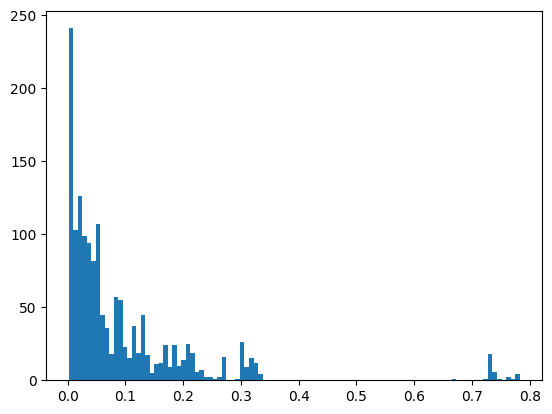

In [165]:
## histograma de la variable a predecir
plt.hist(df_full["riesgo"], bins=100)

C:\Users\pedro\AppData\Local\Temp\ipykernel_8000\960435501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_full.corr()[["riesgo"]], annot=True, fmt=".2f", cmap="coolwarm")


<Axes: >

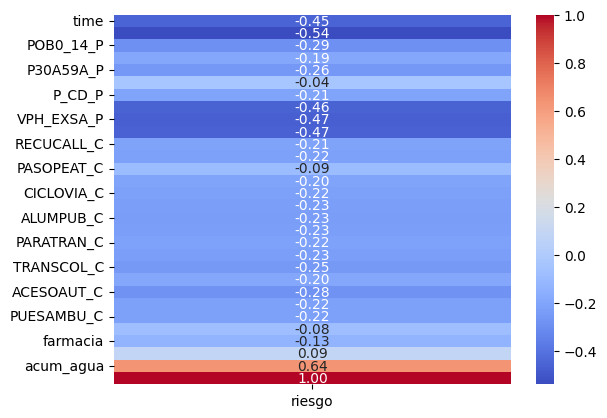

In [166]:

## print heatmap of correlation matrix
sns.heatmap(df_full.corr()[["riesgo"]], annot=True, fmt=".2f", cmap="coolwarm")


In [167]:
agebs_to_keep = df_full["CVE_AGEB"].unique()
df_full.drop(columns=["CVE_AGEB"], inplace=True)
df_full.dropna(inplace=True)
df_full

time     POBTOT  POB0_14_P  P15A29A_P  P30A59A_P   GRAPROES     P_CD_P  \
1239   3600   0.763735  10.981154  17.305000  27.587692   9.103462   2.170385   
1321   3600   2.760200  15.855957  21.856170  40.178511  13.274681   2.646170   
1567   3600   2.961125  15.588140  13.757209  34.650698  11.045116   1.448605   
1404   3900   5.271819  11.944318  22.513864  38.476364  13.536364   1.858182   
1322   3900   2.760200  15.855957  21.856170  40.178511  13.274681   2.646170   
...     ...        ...        ...        ...        ...        ...        ...   
1963  24300  10.097810  16.024412  17.380588  33.346176   8.197353   5.850000   
653   24300   6.668572  15.677234  19.972128  37.441277  10.088085  10.405106   
735   24300   6.571011  13.676977  19.811395  31.405349  10.536047   7.507209   
1390  24300   2.760200  15.855957  21.856170  40.178511  13.274681   2.646170   
2127  24300  10.310057  18.422286  21.292000  33.820000   9.617714   5.100857   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  TRANSCOL_C  ARBOLES_C  \
1239   61.538462   61.538462   61.538462  ...    0.005667   0.003117   
1321   91.489362   91.489362   91.489362  ...    0.003689   0.001845   
1567   74.418605   74.418605   74.418605  ...    0.005812   0.002540   
1404   90.782727   90.782727   90.782727  ...    0.007979   0.003926   
1322   91.489362   91.489362   91.489362  ...    0.003689   0.001845   
...          ...         ...         ...  ...         ...        ...   
1963   87.930882   88.032353   88.032353  ...    0.013305   0.007296   
653    95.260426   95.602766   95.602766  ...    0.003762   0.002173   
735    88.054884   87.953721   87.953721  ...    0.007868   0.003902   
1390   91.489362   91.489362   91.489362  ...    0.003689   0.001845   
2127   91.145714   91.380857   91.380857  ...    0.012201   0.005660   

      ACESOAUT_C  PUESSEMI_C  PUESAMBU_C   escuela  farmacia  hospital  \
1239    0.007273    0.007367    0.007273  0.007367  0.002456  0.004911   
1321    0.001547    0.004135    0.004135  0.009788  0.004195  0.000000   
1567    0.006300    0.006300    0.006300  0.012601  0.000000  0.002100   
1404    0.005129    0.008359    0.008232  0.019505  0.008359  0.000000   
1322    0.001547    0.004135    0.004135  0.009788  0.004195  0.000000   
...          ...         ...         ...       ...       ...       ...   
1963    0.014592    0.013448    0.014020  0.024320  0.024320  0.004864   
653     0.004443    0.004475    0.004378  0.004573  0.006097  0.000000   
735     0.008389    0.008193    0.008193  0.008389  0.005592  0.000000   
1390    0.001547    0.004135    0.004135  0.009788  0.004195  0.000000   
2127    0.013207    0.012829    0.012829  0.017609  0.004402  0.004402   

       acum_agua    riesgo  
1239  100.050616  0.321706  
1321  297.537596  0.150728  
1567   85.808834  0.060857  
1404  235.321353  0.124377  
1322  456.455657  0.231234  
...          ...       ...  
1963    9.736906  0.004690  
653    49.258662  0.011259  
735    31.734214  0.013504  
1390  102.029479  0.051687  
2127    4.782342  0.002042  

[1509 rows x 30 columns]

In [168]:
# Dividimos los datos en características y variable objetivo
X = df_full.drop('riesgo', axis=1)
y = df_full['riesgo']

In [169]:
# Luego, normalizamos las características para que tengan una media de cero y una desviación estándar de uno:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Luego, normalizamos las características para que tengan una media de cero y una desviación estándar de uno:

In [170]:

# Normalizamos las características
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_norm = (X_train - mean) / std
X_test_norm = (X_test - mean) / std


Ahora, construimos la red neuronal utilizando la API secuencial de Keras de TensorFlow:

In [171]:

# Construimos la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_norm.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

La red neuronal tiene dos capas ocultas de 64 neuronas cada una con una función de activación ReLU y una capa de salida con una neurona sin función de activación.

Finalmente, compilamos y entrenamos la red neuronal con los datos de entrenamiento:

In [172]:
X_train_norm

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P  GRAPROES    P_CD_P  \
291  -0.270374  0.443983   1.381759   0.393561  -0.066844 -0.385532  0.467396   
548   0.377557  0.619363  -0.309575   1.072068   0.618959  0.218919  1.526368   
127  -0.270374  0.570483  -0.425751  -0.311646  -0.850692  0.527588  0.508370   
1614  0.431551 -0.704817   0.549047  -1.837441   0.379240  0.265877 -1.491784   
1375  0.809511 -0.794072   0.615301   1.259671   1.879231  1.734408 -1.066847   
...        ...       ...        ...        ...        ...       ...       ...   
1540  0.863505  0.124802   2.955680   1.263372  -0.902659 -1.899025 -1.059128   
1874  1.187470  2.183840   2.780561   2.614209   0.570719 -1.523272 -0.489099   
1775  0.269568 -0.792015  -0.470101   0.476463   1.066827 -0.694074  1.447422   
1880  1.511435  2.183840   2.780561   2.614209   0.570719 -1.523272 -0.489099   
721   0.863505  0.898759   0.076253   0.477732  -0.501396 -0.069428  0.658017   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  DRENAJEP_C  TRANSCOL_C  \
291     1.061075    1.077723    1.097816  ...   -0.027232    0.220811   
548     0.826798    0.817046    0.824853  ...   -1.020811   -0.349102   
127     0.298812    0.294659    0.291932  ...    0.235054    0.241628   
1614   -1.080203   -1.093630   -1.093700  ...   -0.411212   -0.456647   
1375    0.593225    0.583023    0.579745  ...   -1.276498   -1.393515   
...          ...         ...         ...  ...         ...         ...   
1540   -0.700084   -0.457412   -0.504940  ...   -0.023998   -0.045368   
1874    0.775454    0.841447    0.837673  ...    1.658298    1.677126   
1775    0.559128    0.548861    0.545647  ...   -0.570660   -0.634025   
1880    0.775454    0.841447    0.837673  ...    1.658298    1.677126   
721     0.256547    0.235760    0.233146  ...    0.166540    0.450930   

      ARBOLES_C  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C   escuela  farmacia  \
291   -0.150777    0.238836   -0.064847    0.091028  0.161408 -0.614660   
548    0.075344   -0.006023   -0.175514   -0.223038  0.345617  0.018971   
127   -0.314701    0.352147    0.169457    0.121306  0.946202  0.155309   
1614  -1.154857   -0.327649   -0.567203   -0.518144 -0.566435 -0.978078   
1375  -1.708571   -2.061135   -1.528740   -1.470761 -0.753213 -0.395740   
...         ...         ...         ...         ...       ...       ...   
1540  -0.651995   -0.035604   -0.211540   -0.185431 -0.774454 -0.978078   
1874   0.955703    1.355356    1.522165    1.551842 -0.916016 -0.468851   
1775   0.323573   -0.220748   -0.512102   -0.500749 -0.381552 -0.367870   
1880   0.955703    1.355356    1.522165    1.551842 -0.916016 -0.468851   
721   -0.069905    0.433930    0.273634    0.314894 -0.846145 -0.201732   

      hospital  acum_agua  
291  -0.731423   0.537018  
548  -0.001666  -0.658633  
127   1.757215  -1.039438  
1614 -0.091273  -0.949385  
1375 -0.731423  -0.091517  
...        ...        ...  
1540 -0.731423  -0.631100  
1874 -0.731423  -1.020726  
1775 -0.061490   0.168487  
1880 -0.731423  -1.021350  
721  -0.731423  -0.560552  

[1207 rows x 29 columns]

In [173]:
# Compilamos y entrenamos la red neuronal
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_norm, y_train, epochs=100, batch_size=16, validation_split=0.2)



Epoch 1/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0722 - val_loss: 0.0050 - val_mae: 0.0534
Epoch 2/100
61/61 [==============================] - 0s 950us/step - loss: 0.0054 - mae: 0.0481 - val_loss: 0.0043 - val_mae: 0.0501
Epoch 3/100
61/61 [==============================] - 0s 960us/step - loss: 0.0053 - mae: 0.0475 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 4/100
61/61 [==============================] - 0s 950us/step - loss: 0.0039 - mae: 0.0424 - val_loss: 8.0051e-04 - val_mae: 0.0216
Epoch 5/100
61/61 [==============================] - 0s 995us/step - loss: 0.0035 - mae: 0.0402 - val_loss: 0.0150 - val_mae: 0.0722
Epoch 6/100
61/61 [==============================] - 0s 1ms/step - loss: 0.0032 - mae: 0.0365 - val_loss: 0.0104 - val_mae: 0.0616
Epoch 7/100
61/61 [==============================] - 0s 967us/step - loss: 0.0030 - mae: 0.0345 - val_loss: 0.0052 - val_mae: 0.0533
Epoch 8/100
61/61 [==============================] - 0s 983us/step - 

En este ejemplo, estamos utilizando el optimizador RMSprop y la función de pérdida MSE (mean squared error) con una métrica adicional de MAE (mean absolute error). Además, estamos entrenando la red durante 100 épocas con un tamaño de lote de 16 y una validación del 20%.

Finalmente, podemos evaluar el rendimiento del modelo con los datos de prueba y ver las predicciones para algunos ejemplos:

In [174]:
# save model
model.save('model.h5')

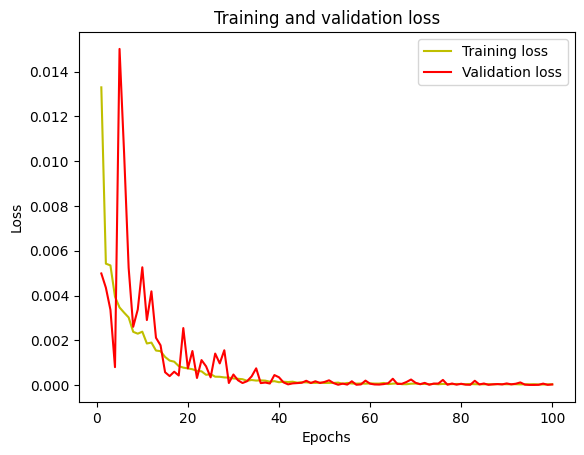

In [175]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("training_validation.png", dpi = 300)
plt.show()


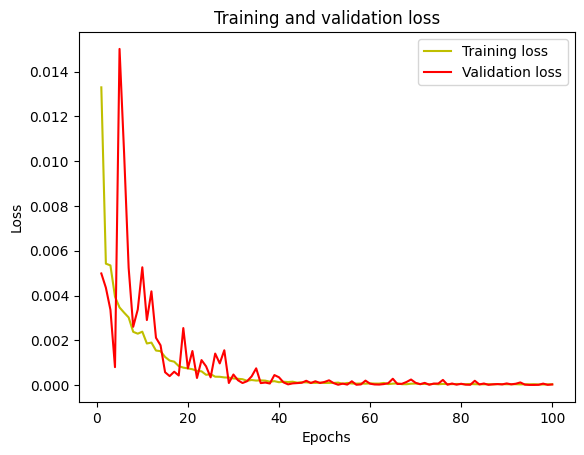

In [176]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("training_validation.png", dpi = 300)
plt.show()

In [177]:
# Evaluamos el rendimiento del modelo
mse, mae = model.evaluate(X_test_norm, y_test)

# Hacemos algunas predicciones
X_new = X_test_norm[:3]
y_pred = model.predict(X_new)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('Predictions:', y_pred.flatten())


1/1 [==============================] - 0s 30ms/step
Mean squared error: 4.4613760110223666e-05
Mean absolute error: 0.004062546882778406
Predictions: [-0.00025724  0.13248628  0.18876715]


In [178]:
X_test_norm

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P  GRAPROES    P_CD_P  \
126  -0.324368  0.570483  -0.425751  -0.311646  -0.850692  0.527588  0.508370   
476   0.863505 -0.488356  -1.002790  -0.664929  -1.285652  0.264215  0.799364   
1427 -0.810316  0.321635  -0.352381   1.511179   1.417348  1.906768 -1.346452   
618  -0.270374  0.942098   0.571088   0.539197   1.136473 -0.364484  1.686290   
1697  0.485545  0.189393  -0.128704   0.187958   0.942644  0.899214  1.487706   
...        ...       ...        ...        ...        ...       ...       ...   
1040  0.431551 -0.606352   0.053265  -1.495410  -1.394867 -1.200970  1.077616   
323   1.457441  0.443983   1.381759   0.393561  -0.066844 -0.385532  0.467396   
445  -0.810316 -0.488356  -1.002790  -0.664929  -1.285652  0.264215  0.799364   
399   1.133476  0.047992  -0.679203   0.751576   0.539828  1.415166 -0.148748   
1381  1.133476 -0.794072   0.615301   1.259671   1.879231  1.734408 -1.066847   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  DRENAJEP_C  TRANSCOL_C  \
126     0.298812    0.294659    0.291932  ...    0.235054    0.241628   
476    -0.444875   -0.457078   -0.458366  ...   -0.093974    0.715398   
1427    0.523954    0.513619    0.510473  ...    0.490900    0.499854   
618     0.962898    0.987033    0.982981  ...   -1.197493   -1.361345   
1697    1.386342    1.387579    1.382761  ...   -0.130063    0.175594   
...          ...         ...         ...  ...         ...         ...   
1040   -0.714975   -0.791699   -0.749663  ...   -0.959165   -1.043186   
323     1.061075    1.077723    1.097816  ...   -0.027232    0.220811   
445    -0.444875   -0.457078   -0.458366  ...   -0.093974    0.715398   
399     1.225294    1.216310    1.211820  ...    0.921265    0.329954   
1381    0.593225    0.583023    0.579745  ...   -1.276498   -1.393515   

      ARBOLES_C  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C   escuela  farmacia  \
126   -0.314701    0.352147    0.169457    0.121306  0.946202  0.155309   
476    0.756768    0.848761    0.761010    0.745999  1.127194 -0.978078   
1427  -0.050298   -0.754637    0.347219    0.332065 -0.107949  0.182359   
618   -1.447032   -1.004982   -1.377683   -1.363916 -1.099543 -0.131678   
1697   0.669317    0.130321    0.059726    0.034416  1.840251  0.806216   
...         ...         ...         ...         ...       ...       ...   
1040  -0.836919   -0.608975   -1.086794   -1.098666 -0.913662 -0.466390   
323   -0.150777    0.238836   -0.064847    0.091028  0.161408 -0.614660   
445    0.756768    0.848761    0.761010    0.745999  1.127194 -0.978078   
399    0.523995    0.846968    0.863293    0.699583  1.125888 -0.096916   
1381  -1.708571   -2.061135   -1.528740   -1.470761 -0.753213 -0.395740   

      hospital  acum_agua  
126   1.757215  -1.039405  
476   3.140203   0.207208  
1427 -0.731423   2.196776  
618  -0.731423   1.055298  
1697  0.052150   0.182102  
...        ...        ...  
1040 -0.731423  -0.193141  
323  -0.731423  -0.466229  
445   3.140203   0.630935  
399   0.235984  -1.002011  
1381 -0.731423  -0.108980  

[302 rows x 29 columns]

In [179]:
X_new

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P  GRAPROES    P_CD_P  \
126  -0.324368  0.570483  -0.425751  -0.311646  -0.850692  0.527588  0.508370   
476   0.863505 -0.488356  -1.002790  -0.664929  -1.285652  0.264215  0.799364   
1427 -0.810316  0.321635  -0.352381   1.511179   1.417348  1.906768 -1.346452   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  DRENAJEP_C  TRANSCOL_C  \
126     0.298812    0.294659    0.291932  ...    0.235054    0.241628   
476    -0.444875   -0.457078   -0.458366  ...   -0.093974    0.715398   
1427    0.523954    0.513619    0.510473  ...    0.490900    0.499854   

      ARBOLES_C  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C   escuela  farmacia  \
126   -0.314701    0.352147    0.169457    0.121306  0.946202  0.155309   
476    0.756768    0.848761    0.761010    0.745999  1.127194 -0.978078   
1427  -0.050298   -0.754637    0.347219    0.332065 -0.107949  0.182359   

      hospital  acum_agua  
126   1.757215  -1.039405  
476   3.140203   0.207208  
1427 -0.731423   2.196776  

[3 rows x 29 columns]

# Proceso

In [180]:
columnas = X_new.columns
columnas[:5]

Index(['time', 'POBTOT', 'POB0_14_P', 'P15A29A_P', 'P30A59A_P'], dtype='object')

In [181]:
df_modelo = df_full[columnas]

# Normalizamos las características
mean = df_modelo.mean(axis=0)
std = df_modelo.std(axis=0)
X_train_norm = (df_modelo - mean) / std



X_train_norm

time    POBTOT  POB0_14_P  P15A29A_P  P30A59A_P  GRAPROES    P_CD_P  \
1239 -2.117738 -1.659888  -0.590074  -0.473076  -1.510217 -0.996461 -1.235766   
1321 -2.117738 -0.784132   0.606933   1.259815   1.879005  1.734330 -1.066289   
1567 -2.117738 -0.695995   0.541170  -1.823924   0.391017  0.274690 -1.492867   
1404 -2.063571  0.317599  -0.353569   1.510237   1.420818  1.905647 -1.346974   
1322 -2.063571 -0.784132   0.606933   1.259815   1.879005  1.734330 -1.066289   
...        ...       ...        ...        ...        ...       ...       ...   
1963  1.619821  2.434536   0.648297  -0.444296   0.039864 -1.589668  0.074928   
653   1.619821  0.930289   0.563047   0.542452   1.142191 -0.351854  1.697475   
735   1.619821  0.887494   0.071884   0.481252  -0.482572 -0.058585  0.665232   
1390  1.619821 -0.784132   0.606933   1.259815   1.879005  1.734330 -1.066289   
2127  1.619821  2.527639   1.237094   1.045003   0.167408 -0.659793 -0.191920   

      VPH_C_EL_P  VPH_EXSA_P  VPH_DREN_P  ...  DRENAJEP_C  TRANSCOL_C  \
1239   -2.326718   -2.342697   -2.340296  ...   -0.167828   -0.526665   
1321    0.607332    0.596903    0.593868  ...   -1.265764   -1.380730   
1567   -1.064953   -1.078546   -1.078483  ...   -0.419770   -0.464151   
1404    0.538109    0.527549    0.524642  ...    0.462229    0.471637   
1322    0.607332    0.596903    0.593868  ...   -1.265764   -1.380730   
...          ...         ...         ...  ...         ...         ...   
1963    0.258737    0.257607    0.255199  ...    2.934464    2.771073   
653     0.976753    1.000622    0.996841  ...   -1.188520   -1.349256   
735     0.270884    0.249889    0.247496  ...    0.145101    0.423772   
1390    0.607332    0.596903    0.593868  ...   -1.265764   -1.380730   
2127    0.573668    0.586254    0.583238  ...    2.372522    2.294322   

      ARBOLES_C  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C   escuela  farmacia  \
1239  -0.693922    0.009080   -0.109044   -0.105061 -0.913153 -0.625213   
1321  -1.687981   -2.037724   -1.510781   -1.455203 -0.752725 -0.385972   
1567  -1.144916   -0.338564   -0.571804   -0.523560 -0.566326 -0.963040   
1404  -0.061599   -0.757097    0.321165    0.307930 -0.108773  0.186894   
1322  -1.687981   -2.037724   -1.510781   -1.455203 -0.752725 -0.385972   
...         ...         ...         ...         ...       ...       ...   
1963   2.571163    2.625592    2.528198    2.798483  0.210380  2.382622   
653   -1.431472   -1.002485   -1.363268   -1.350710 -1.098352 -0.124301   
735   -0.080829    0.407934    0.249307    0.291137 -0.845468 -0.193721   
1390  -1.687981   -2.037724   -1.510781   -1.455203 -0.752725 -0.385972   
2127   1.292947    2.130320    2.260018    2.286142 -0.234402 -0.357439   

      hospital  acum_agua  
1239  0.719600  -0.151521  
1321 -0.744286   1.642624  
1567 -0.118346  -0.280906  
1404 -0.744286   1.077397  
1322 -0.744286   3.086376  
...        ...        ...  
1963  0.705470  -0.972010  
653  -0.744286  -0.612960  
735  -0.744286  -0.772167  
1390 -0.744286  -0.133543  
2127  0.567821  -1.017022  

[1509 rows x 29 columns]

In [182]:
y_pred = model.predict(X_train_norm)
len(y_pred)

48/48 [==============================] - 0s 489us/step


1509

In [183]:
print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")

(1509, 30) df_full
(2128, 35) df_proceso
(2128, 35) df_visual


In [147]:
agebs_to_keep

array(['1053', '1068', '1227', '1072', '0835', '0924', '0411', '0318',
       '0676', '0708', '0727', '1265', '0731', '127A', '0746', '0680',
       '0750', '0801', '1142', '0322', '1528', '1458', '0362', '077A',
       '0712', '1439'], dtype=object)

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
1239  0600200011053     1053   3600  0.245698   0.0  1.922391  407.209309   
1321  0600200011068     1068   3600  0.416040   0.0  2.214135  715.165608   
1567  0600200011227     1227   3600  0.180206   0.0  0.377539  476.170353   
1404  0600200011072     1072   3900  0.655693   0.0  2.369761  358.889404   
1322  0600200011068     1068   3900  0.638252   0.0  2.210387  715.165608   
...             ...      ...    ...       ...   ...       ...         ...   
1963  0600200011458     1458  24300  0.047361   NaN       NaN  205.589137   
653   0600200010727     0727  24300  0.075082   NaN       NaN  656.062487   
735   0600200010731     0731  24300  0.088734   NaN       NaN  357.631414   
1390  0600200011068     1068  24300  0.142666   NaN       NaN  715.165608   
2127  0601000010362     0362  24300  0.021053   NaN       NaN  227.156848   

      POBTOT  POB0_14_P  P15A29A_P  ...  DRENAJEP_C  TRANSCOL_C  ARBOLES_C  \
1239     311  10.981154  17.305000  ...    2.769231    2.307692   1.269231   
1321    1974  15.855957  21.856170  ...    3.000000    2.638298   1.319149   
1567    1410  15.588140  13.757209  ...    2.953488    2.767442   1.209302   
1404    1892  11.944318  22.513864  ...    2.977273    2.863636   1.409091   
1322    1974  15.855957  21.856170  ...    3.000000    2.638298   1.319149   
...      ...        ...        ...  ...         ...         ...        ...   
1963    2076  16.024412  17.380588  ...    2.911765    2.735294   1.500000   
653     4375  15.677234  19.972128  ...    2.872340    2.468085   1.425532   
735     2350  13.676977  19.811395  ...    2.697674    2.813953   1.395349   
1390    1974  15.855957  21.856170  ...    3.000000    2.638298   1.319149   
2127    2342  18.422286  21.292000  ...    2.914286    2.771429   1.285714   

      ACESOAUT_C  PUESSEMI_C  PUESAMBU_C  escuela  farmacia  hospital  \
1239    2.961538    3.000000    2.961538      3.0       1.0       2.0   
1321    1.106383    2.957447    2.957447      7.0       3.0       0.0   
1567    3.000000    3.000000    3.000000      6.0       0.0       1.0   
1404    1.840909    3.000000    2.954545      7.0       3.0       0.0   
1322    1.106383    2.957447    2.957447      7.0       3.0       0.0   
...          ...         ...         ...      ...       ...       ...   
1963    3.000000    2.764706    2.882353      5.0       5.0       1.0   
653     2.914894    2.936170    2.872340      3.0       4.0       0.0   
735     3.000000    2.930233    2.930233      3.0       2.0       0.0   
1390    1.106383    2.957447    2.957447      7.0       3.0       0.0   
2127    3.000000    2.914286    2.914286      4.0       1.0       1.0   

       acum_agua  
1239  100.050616  
1321  297.537596  
1567   85.808834  
1404  235.321353  
1322  456.455657  
...          ...  
1963    9.736906  
653    49.258662  
735    31.734214  
1390  102.029479  
2127    4.782342  

[1509 rows x 35 columns]

In [186]:
df_proceso = df_proceso[df_proceso["CVE_AGEB"].isin(agebs_to_keep)].dropna(subset=["Depth"])
df_proceso

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
1239  0600200011053     1053   3600  0.245698   0.0  1.922391  407.209309   
1321  0600200011068     1068   3600  0.416040   0.0  2.214135  715.165608   
1567  0600200011227     1227   3600  0.180206   0.0  0.377539  476.170353   
1404  0600200011072     1072   3900  0.655693   0.0  2.369761  358.889404   
1322  0600200011068     1068   3900  0.638252   0.0  2.210387  715.165608   
...             ...      ...    ...       ...   ...       ...         ...   
1963  0600200011458     1458  24300  0.047361   NaN       NaN  205.589137   
653   0600200010727     0727  24300  0.075082   NaN       NaN  656.062487   
735   0600200010731     0731  24300  0.088734   NaN       NaN  357.631414   
1390  0600200011068     1068  24300  0.142666   NaN       NaN  715.165608   
2127  0601000010362     0362  24300  0.021053   NaN       NaN  227.156848   

      POBTOT  POB0_14_P  P15A29A_P  ...  DRENAJEP_C  TRANSCOL_C  ARBOLES_C  \
1239     311  10.981154  17.305000  ...    2.769231    2.307692   1.269231   
1321    1974  15.855957  21.856170  ...    3.000000    2.638298   1.319149   
1567    1410  15.588140  13.757209  ...    2.953488    2.767442   1.209302   
1404    1892  11.944318  22.513864  ...    2.977273    2.863636   1.409091   
1322    1974  15.855957  21.856170  ...    3.000000    2.638298   1.319149   
...      ...        ...        ...  ...         ...         ...        ...   
1963    2076  16.024412  17.380588  ...    2.911765    2.735294   1.500000   
653     4375  15.677234  19.972128  ...    2.872340    2.468085   1.425532   
735     2350  13.676977  19.811395  ...    2.697674    2.813953   1.395349   
1390    1974  15.855957  21.856170  ...    3.000000    2.638298   1.319149   
2127    2342  18.422286  21.292000  ...    2.914286    2.771429   1.285714   

      ACESOAUT_C  PUESSEMI_C  PUESAMBU_C  escuela  farmacia  hospital  \
1239    2.961538    3.000000    2.961538      3.0       1.0       2.0   
1321    1.106383    2.957447    2.957447      7.0       3.0       0.0   
1567    3.000000    3.000000    3.000000      6.0       0.0       1.0   
1404    1.840909    3.000000    2.954545      7.0       3.0       0.0   
1322    1.106383    2.957447    2.957447      7.0       3.0       0.0   
...          ...         ...         ...      ...       ...       ...   
1963    3.000000    2.764706    2.882353      5.0       5.0       1.0   
653     2.914894    2.936170    2.872340      3.0       4.0       0.0   
735     3.000000    2.930233    2.930233      3.0       2.0       0.0   
1390    1.106383    2.957447    2.957447      7.0       3.0       0.0   
2127    3.000000    2.914286    2.914286      4.0       1.0       1.0   

       acum_agua  
1239  100.050616  
1321  297.537596  
1567   85.808834  
1404  235.321353  
1322  456.455657  
...          ...  
1963    9.736906  
653    49.258662  
735    31.734214  
1390  102.029479  
2127    4.782342  

[1509 rows x 35 columns]

In [187]:
print(df_full.shape, "df_full")
print(df_proceso.shape, "df_proceso")
print(df_visual.shape, "df_visual")

(1509, 30) df_full
(1509, 35) df_proceso
(2128, 35) df_visual


In [188]:
df_proceso["riesgo"] = y_pred
df_proceso.head()

CVEGEO CVE_AGEB  time     Depth  Rain  Velocity        area  \
1239  0600200011053     1053  3600  0.245698   0.0  1.922391  407.209309   
1321  0600200011068     1068  3600  0.416040   0.0  2.214135  715.165608   
1567  0600200011227     1227  3600  0.180206   0.0  0.377539  476.170353   
1404  0600200011072     1072  3900  0.655693   0.0  2.369761  358.889404   
1322  0600200011068     1068  3900  0.638252   0.0  2.210387  715.165608   

      POBTOT  POB0_14_P  P15A29A_P  ...  TRANSCOL_C  ARBOLES_C  ACESOAUT_C  \
1239     311  10.981154  17.305000  ...    2.307692   1.269231    2.961538   
1321    1974  15.855957  21.856170  ...    2.638298   1.319149    1.106383   
1567    1410  15.588140  13.757209  ...    2.767442   1.209302    3.000000   
1404    1892  11.944318  22.513864  ...    2.863636   1.409091    1.840909   
1322    1974  15.855957  21.856170  ...    2.638298   1.319149    1.106383   

      PUESSEMI_C  PUESAMBU_C  escuela  farmacia  hospital   acum_agua  \
1239    3.000000    2.961538      3.0       1.0       2.0  100.050616   
1321    2.957447    2.957447      7.0       3.0       0.0  297.537596   
1567    3.000000    3.000000      6.0       0.0       1.0   85.808834   
1404    3.000000    2.954545      7.0       3.0       0.0  235.321353   
1322    2.957447    2.957447      7.0       3.0       0.0  456.455657   

        riesgo  
1239  0.269148  
1321  0.149790  
1567  0.053422  
1404  0.120422  
1322  0.225811  

[5 rows x 36 columns]

In [189]:
agebs_proceso.drop(columns=["CVE_ENT","CVE_MUN","CVE_LOC","CVE_AGEB"], inplace=True)
agebs_proceso.head()

CVEGEO                                           geometry
0  0600200010676  POLYGON ((2319182.093 807954.424, 2319286.446 ...
1  0600200010727  POLYGON ((2318544.164 807545.878, 2318566.020 ...
2  0600200011142  POLYGON ((2316882.335 805042.325, 2317096.142 ...
3  0600200010411  POLYGON ((2319801.226 808675.655, 2319836.062 ...
4  0600200011068  POLYGON ((2320222.167 809638.735, 2320222.724 ...

In [190]:
df_proceso2 = gpd.GeoDataFrame(df_proceso.merge(agebs_proceso, on="CVEGEO"))
df_proceso2.head()

CVEGEO CVE_AGEB  time     Depth  Rain  Velocity        area  POBTOT  \
0  0600200011053     1053  3600  0.245698  0.00  1.922391  407.209309     311   
1  0600200011053     1053  3900  0.511827  0.00  1.654565  407.209309     311   
2  0600200011053     1053  4200  0.588490  0.96  1.657816  407.209309     311   
3  0600200011053     1053  4500  0.597594  0.96  1.701810  407.209309     311   
4  0600200011053     1053  4800  0.593713  2.28  1.713636  407.209309     311   

   POB0_14_P  P15A29A_P  ...  ARBOLES_C  ACESOAUT_C  PUESSEMI_C  PUESAMBU_C  \
0  10.981154     17.305  ...   1.269231    2.961538         3.0    2.961538   
1  10.981154     17.305  ...   1.269231    2.961538         3.0    2.961538   
2  10.981154     17.305  ...   1.269231    2.961538         3.0    2.961538   
3  10.981154     17.305  ...   1.269231    2.961538         3.0    2.961538   
4  10.981154     17.305  ...   1.269231    2.961538         3.0    2.961538   

   escuela  farmacia  hospital   acum_agua    riesgo  \
0      3.0       1.0       2.0  100.050616  0.269148   
1      3.0       1.0       2.0  208.420830  0.618977   
2      3.0       1.0       2.0  239.638543  0.717160   
3      3.0       1.0       2.0  243.345956  0.732811   
4      3.0       1.0       2.0  241.765366  0.733086   

                                            geometry  
0  POLYGON ((2320584.490 808795.663, 2320592.833 ...  
1  POLYGON ((2320584.490 808795.663, 2320592.833 ...  
2  POLYGON ((2320584.490 808795.663, 2320592.833 ...  
3  POLYGON ((2320584.490 808795.663, 2320592.833 ...  
4  POLYGON ((2320584.490 808795.663, 2320592.833 ...  

[5 rows x 37 columns]

In [191]:
df_visual2 = df_visual.merge(df_proceso2[["CVEGEO","time","riesgo"]], on=["CVEGEO","time"], how="left")
df_visual2

CVEGEO CVE_AGEB   time     Depth  Rain  Velocity        area  \
0     0600200010318     0318      0       NaN   0.0       NaN  339.556144   
1     0600200010676     0676      0       NaN   0.0       NaN  381.991619   
2     0600200010680     0680      0       NaN   0.0       NaN  315.090313   
3     0600200010708     0708      0       NaN   0.0       NaN  314.927699   
4     0600200010712     0712      0       NaN   0.0       NaN  417.701078   
...             ...      ...    ...       ...   ...       ...         ...   
2123  0600200011458     1458  24300  0.047361   NaN       NaN  205.589137   
2124  0600200010727     0727  24300  0.075082   NaN       NaN  656.062487   
2125  0600200010731     0731  24300  0.088734   NaN       NaN  357.631414   
2126  0600200011068     1068  24300  0.142666   NaN       NaN  715.165608   
2127  0601000010362     0362  24300  0.021053   NaN       NaN  227.156848   

      POBTOT  POB0_14_P  P15A29A_P  ...  TRANSCOL_C  ARBOLES_C  ACESOAUT_C  \
0       1925  11.397551  17.568980  ...    2.346939   1.653061    2.938776   
1       2119  18.954194  19.591290  ...    2.806452   1.451613    3.000000   
2       1467  10.623214  20.527500  ...    2.392857   1.464286    3.000000   
3       1086   9.315185  16.823333  ...    2.666667   1.555556    3.000000   
4       2482  12.117353  21.365588  ...    2.529412   1.705882    3.000000   
...      ...        ...        ...  ...         ...        ...         ...   
2123    2076  16.024412  17.380588  ...    2.735294   1.500000    3.000000   
2124    4375  15.677234  19.972128  ...    2.468085   1.425532    2.914894   
2125    2350  13.676977  19.811395  ...    2.813953   1.395349    3.000000   
2126    1974  15.855957  21.856170  ...    2.638298   1.319149    1.106383   
2127    2342  18.422286  21.292000  ...    2.771429   1.285714    3.000000   

      PUESSEMI_C  PUESAMBU_C  escuela  farmacia  hospital   acum_agua  \
0       2.979592    2.918367     13.0       6.0       0.0         NaN   
1       2.838710    2.935484      9.0       1.0       0.0         NaN   
2       3.000000    2.857143     12.0       2.0       1.0         NaN   
3       2.925926    2.888889     12.0       0.0       4.0         NaN   
4       3.000000    2.911765     11.0       3.0       1.0         NaN   
...          ...         ...      ...       ...       ...         ...   
2123    2.764706    2.882353      5.0       5.0       1.0    9.736906   
2124    2.936170    2.872340      3.0       4.0       0.0   49.258662   
2125    2.930233    2.930233      3.0       2.0       0.0   31.734214   
2126    2.957447    2.957447      7.0       3.0       0.0  102.029479   
2127    2.914286    2.914286      4.0       1.0       1.0    4.782342   

        riesgo  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
2123  0.009636  
2124  0.020173  
2125  0.017934  
2126  0.048707  
2127  0.000037  

[2128 rows x 36 columns]

In [192]:
def plot_specific_time(time ):
  df = df_proceso2[df_proceso2["time"] == time]
  
  fig, ax = plt.subplots(figsize=(10,10))
  df.plot(column="riesgo", cmap="coolwarm", ax=ax, legend=True, vmin=0, vmax=0.8)
  agebs_proceso.boundary.plot(color=None, edgecolor='black', linewidth=0.5, ax=ax)
  plt.title(f"Riesgo de inundación en el instante {time}")
  plt.show()



In [193]:
df_proceso2.riesgo.max()

0.74216795

In [194]:
df_proceso2.riesgo.min()

-0.00592128

<Axes: >

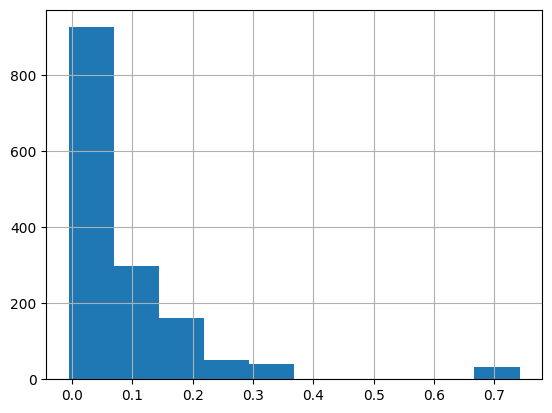

In [195]:
df_proceso2.riesgo.hist()

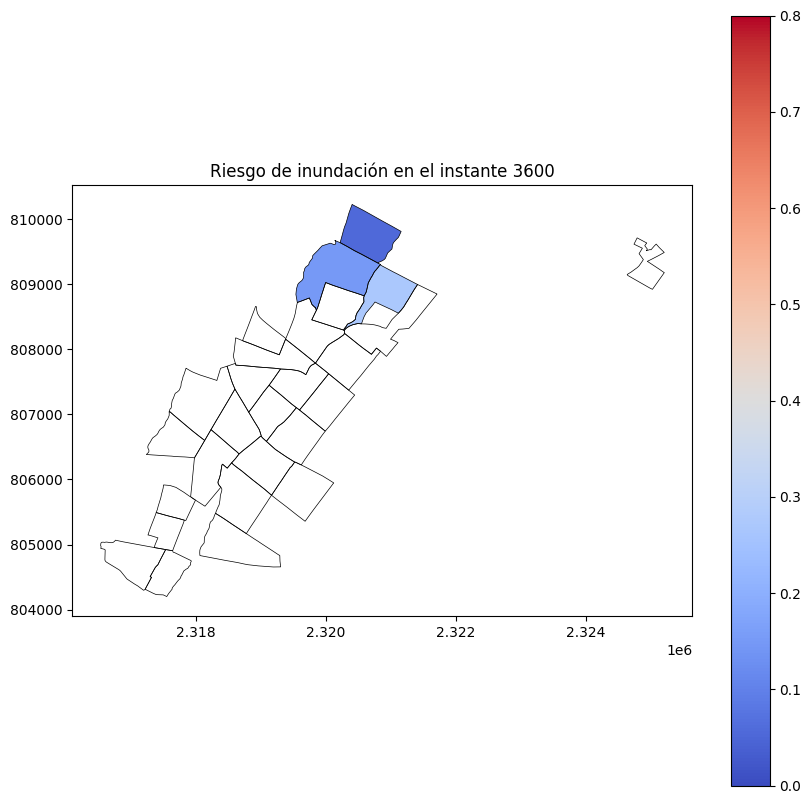

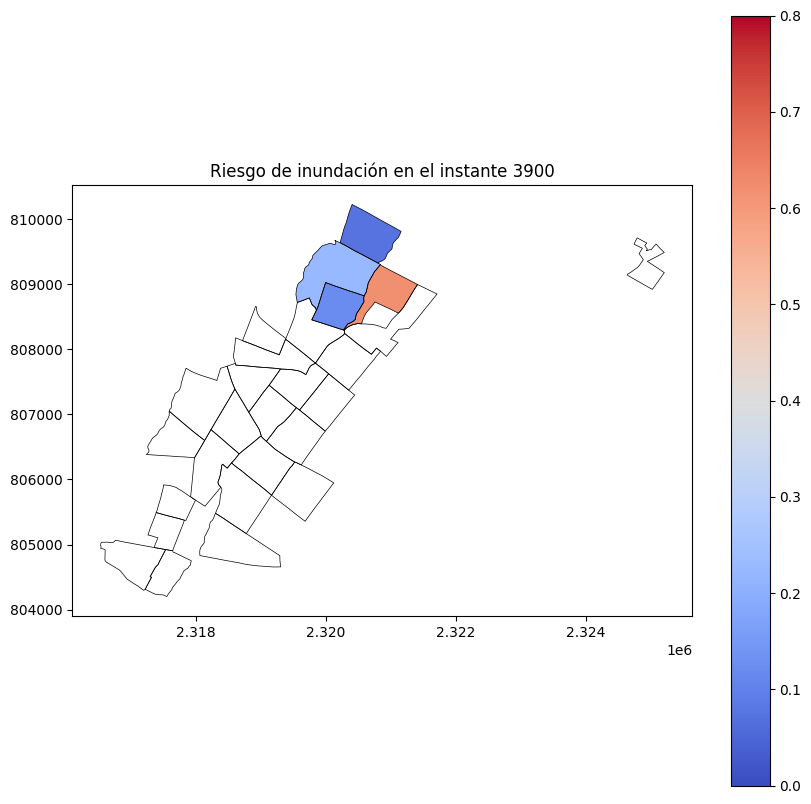

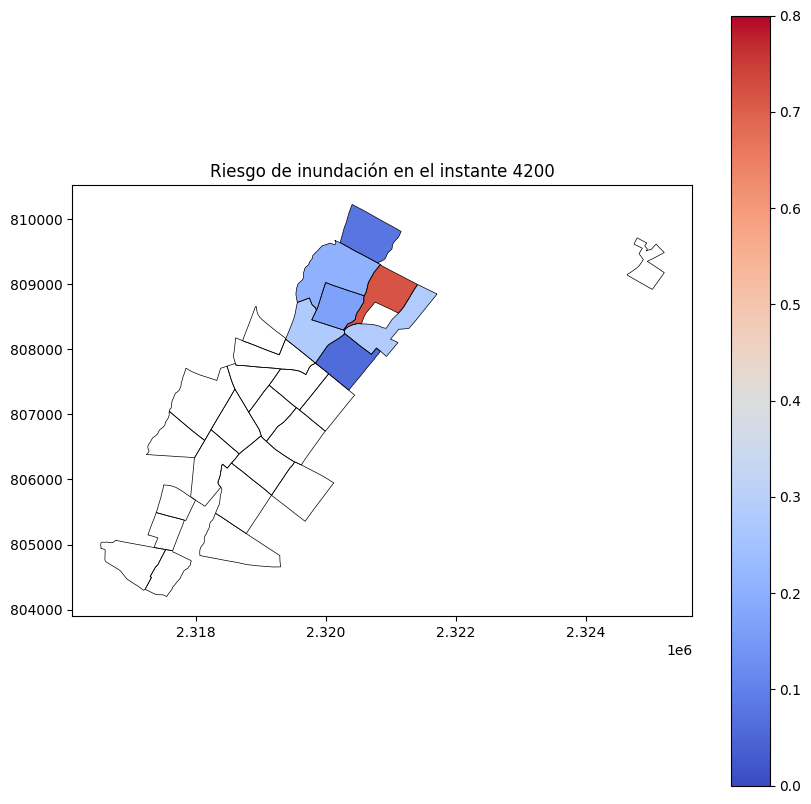

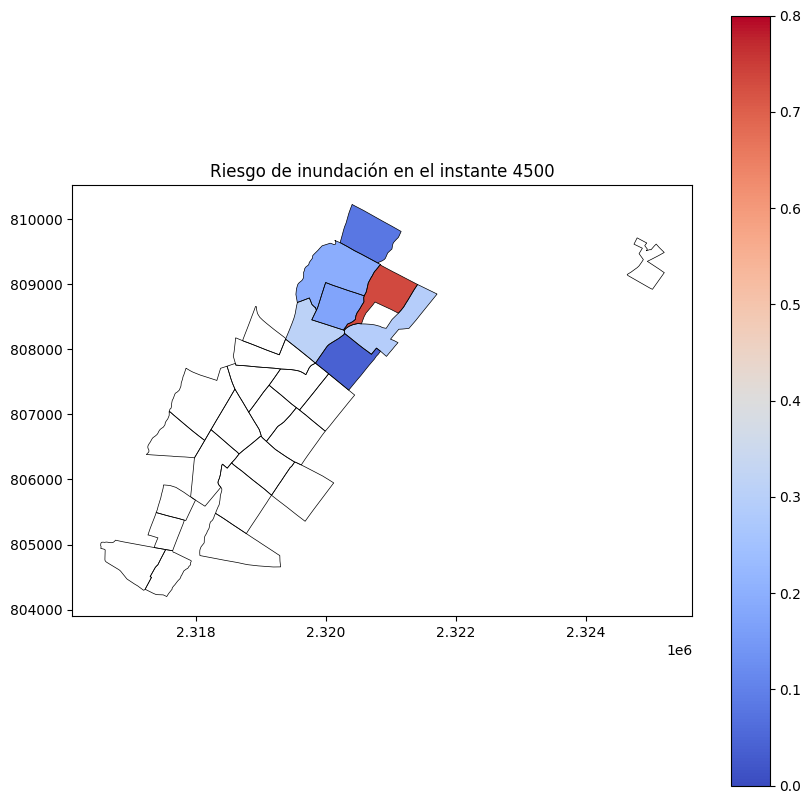

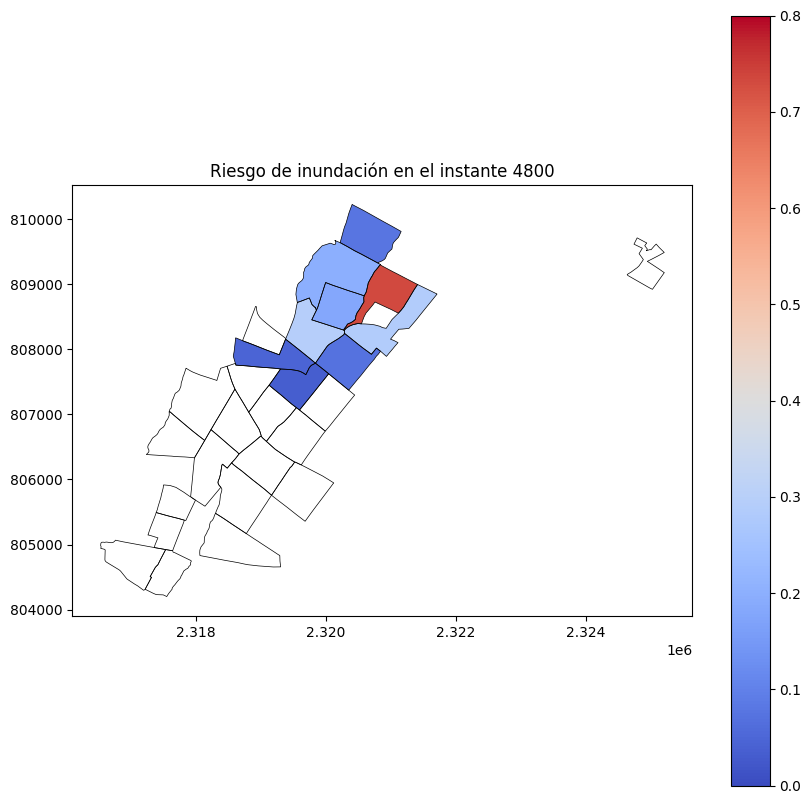

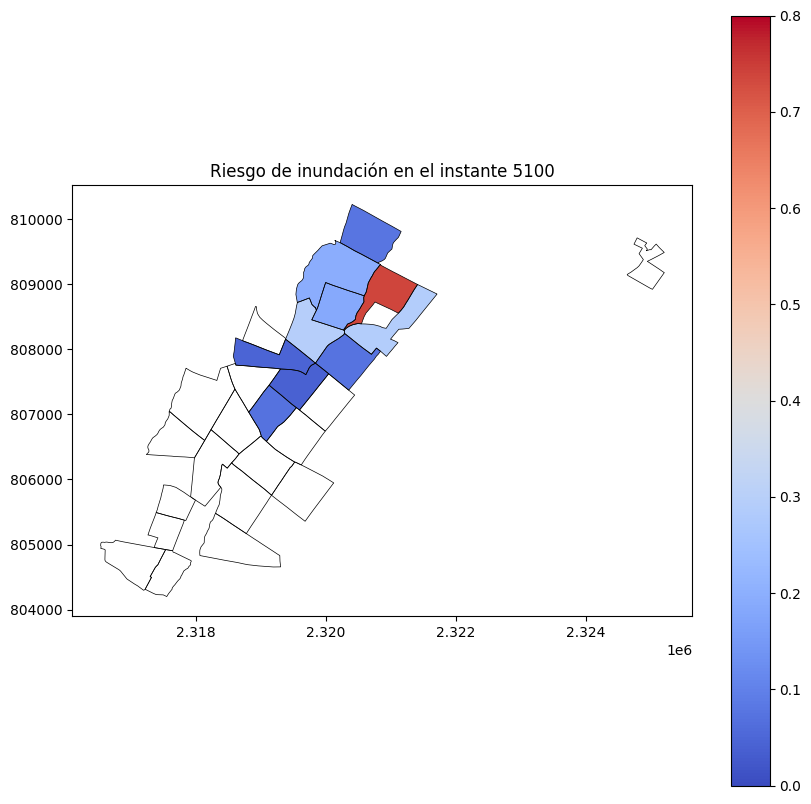

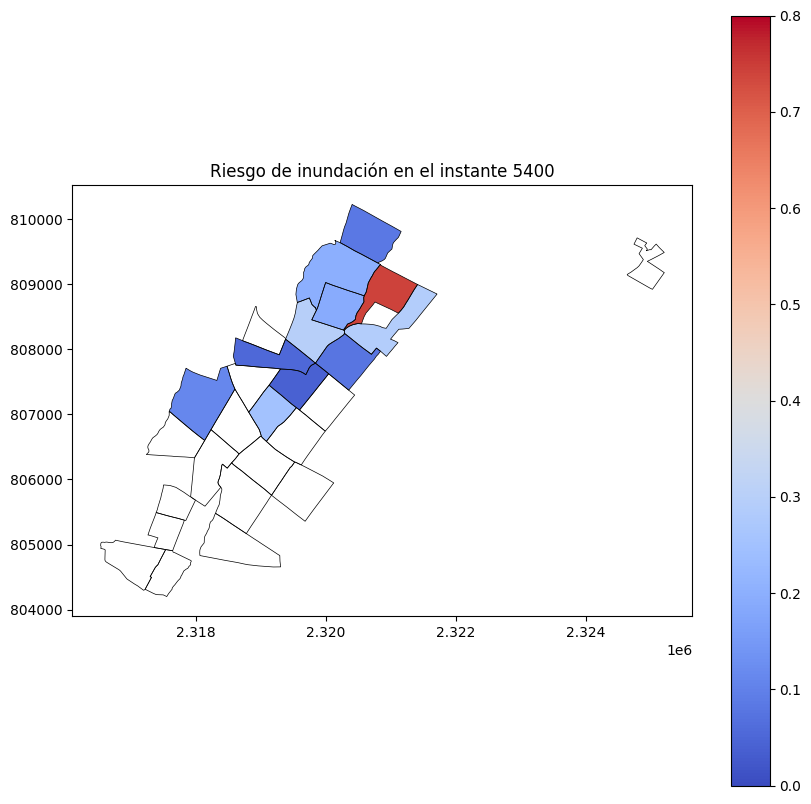

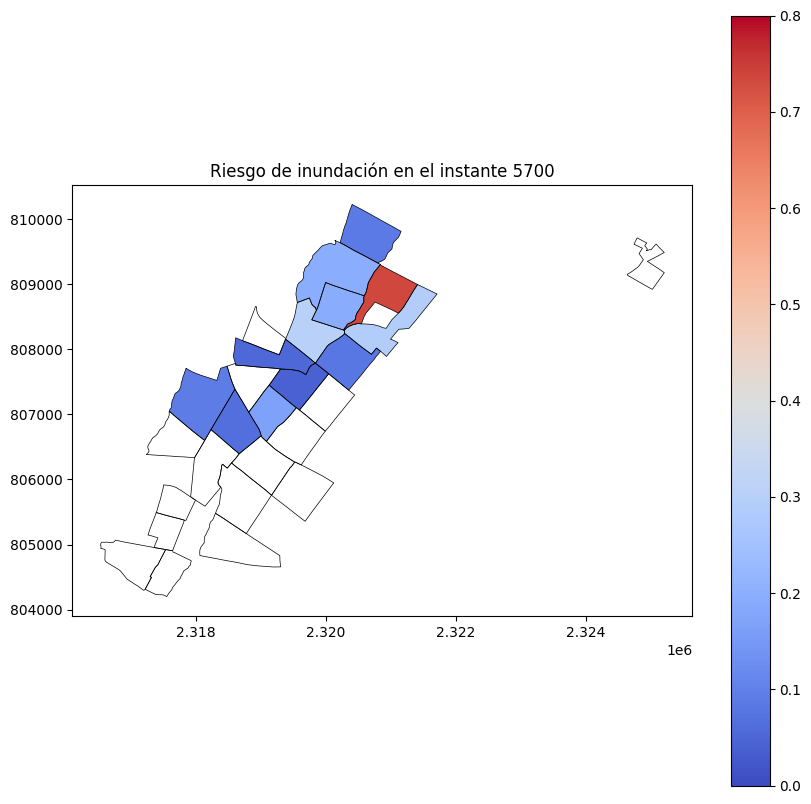

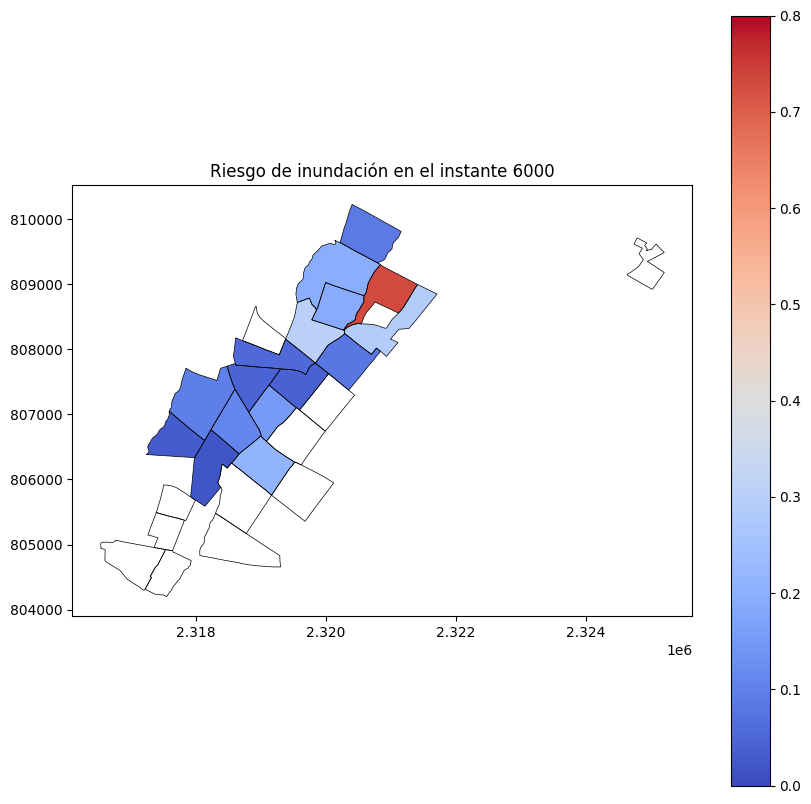

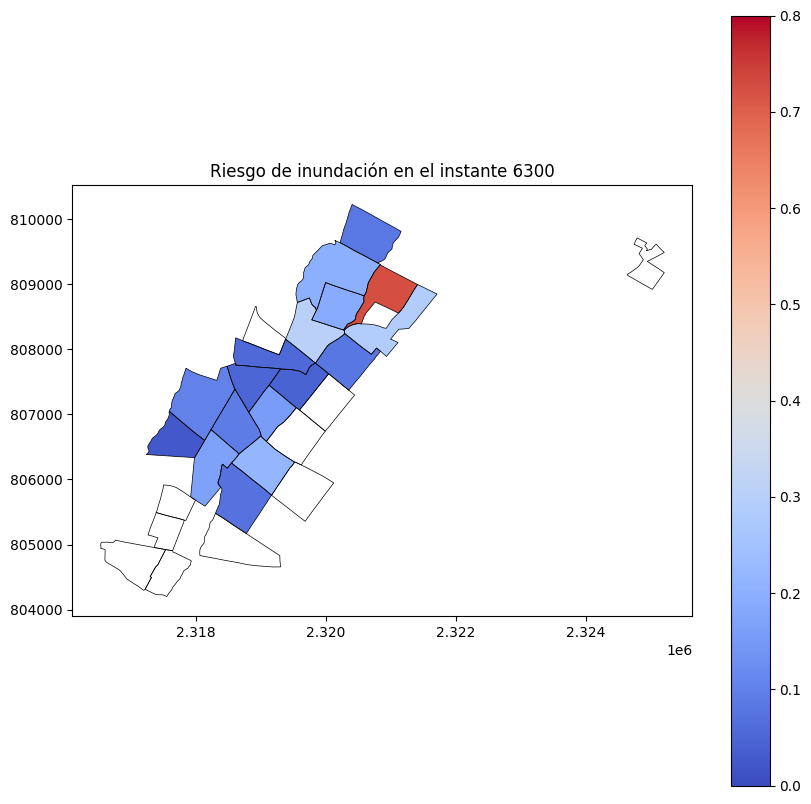

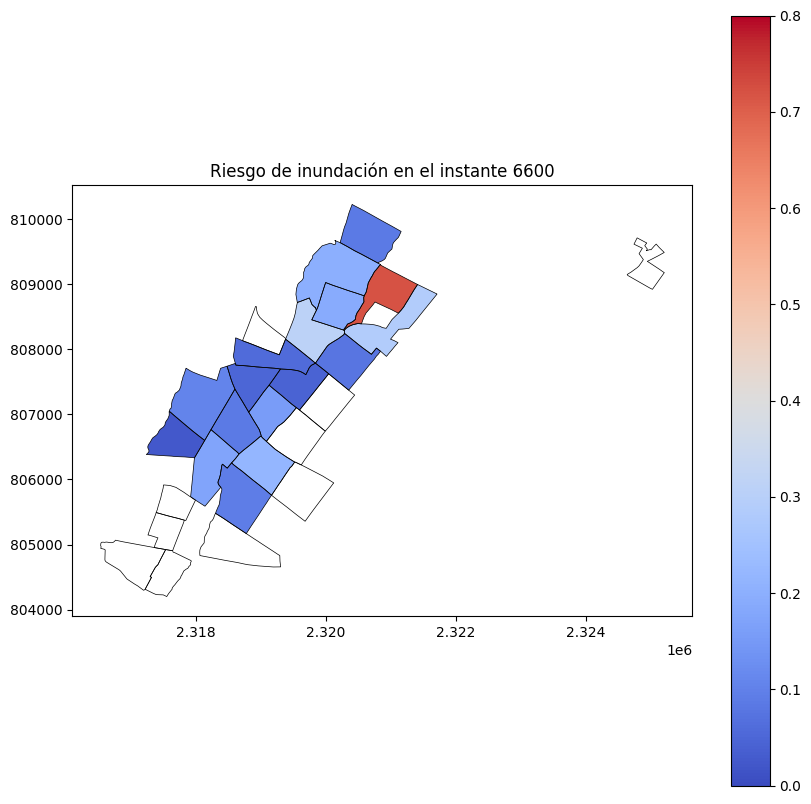

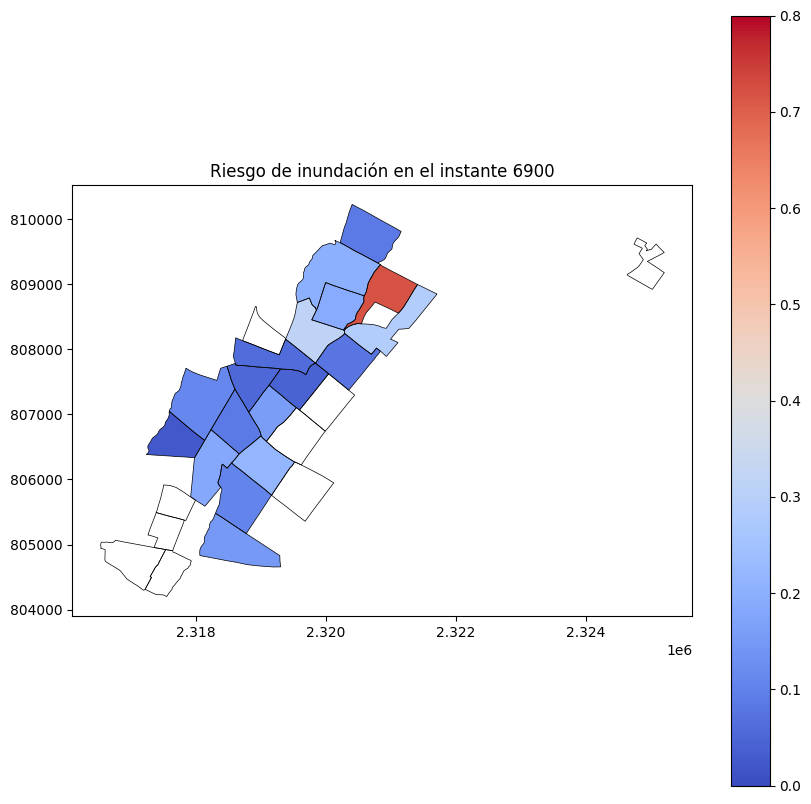

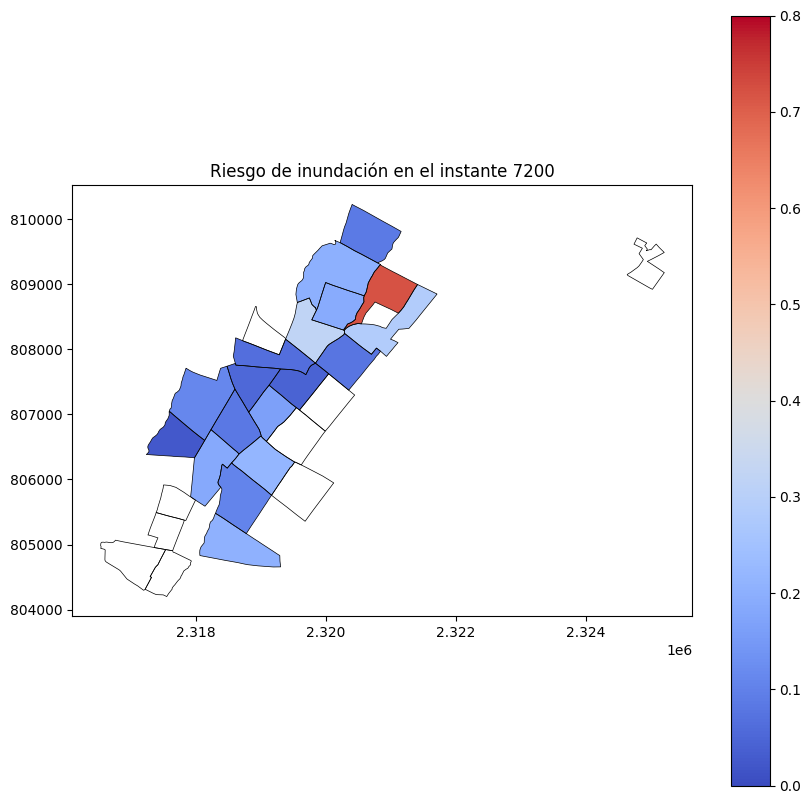

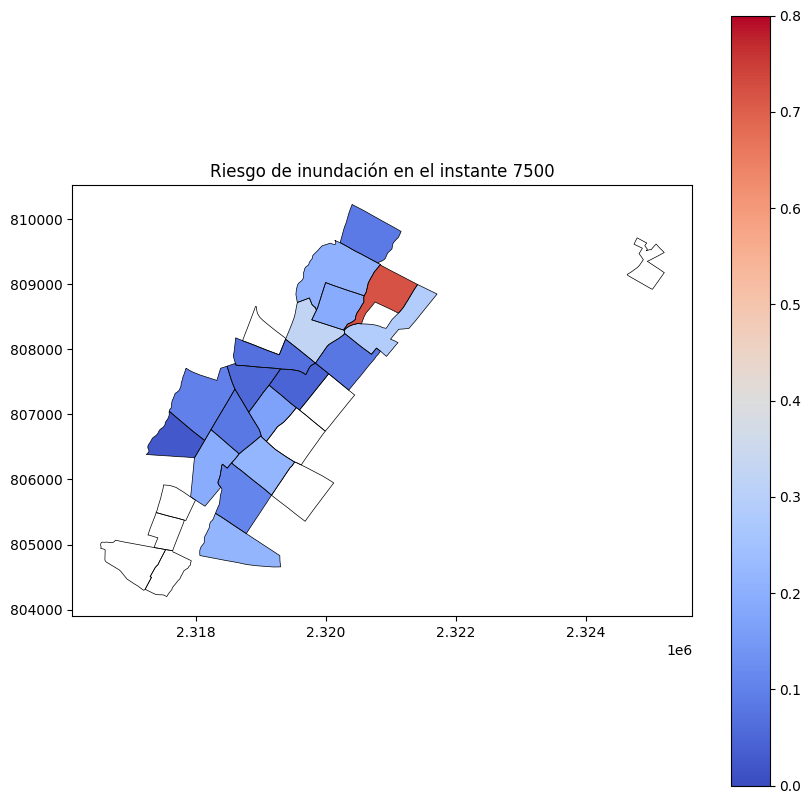

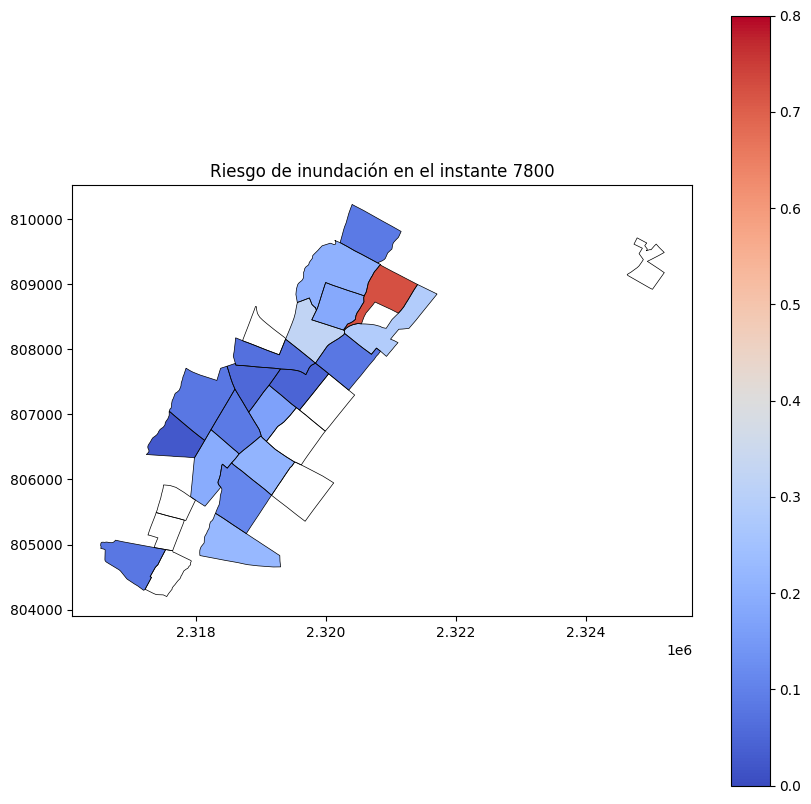

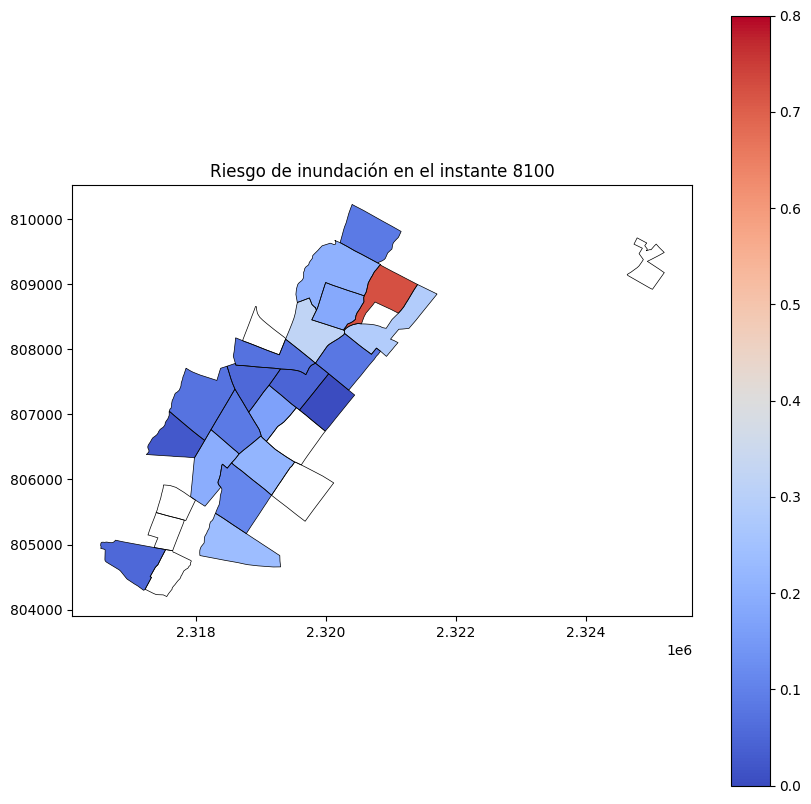

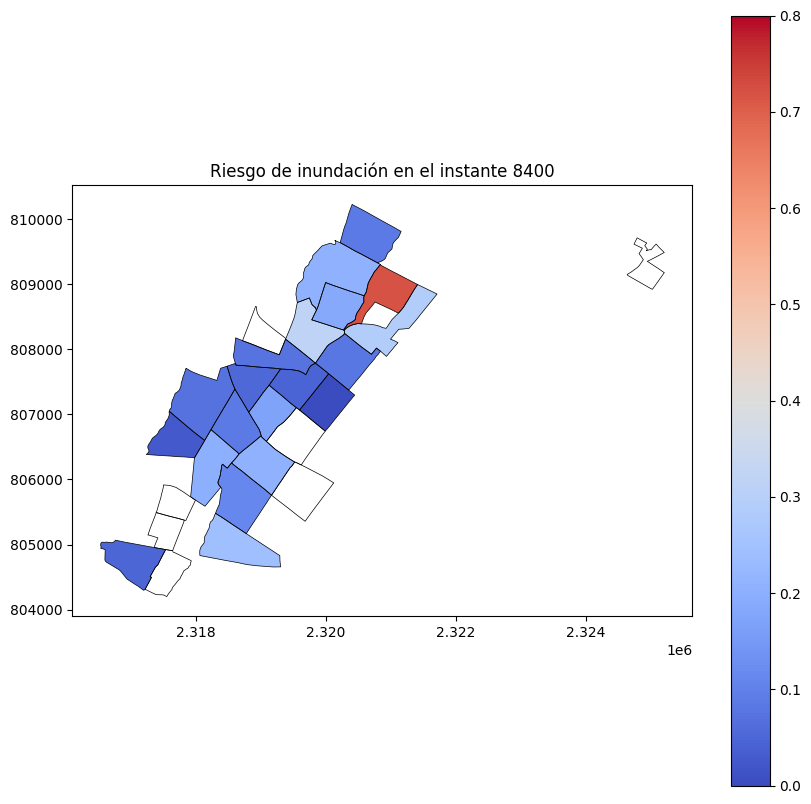

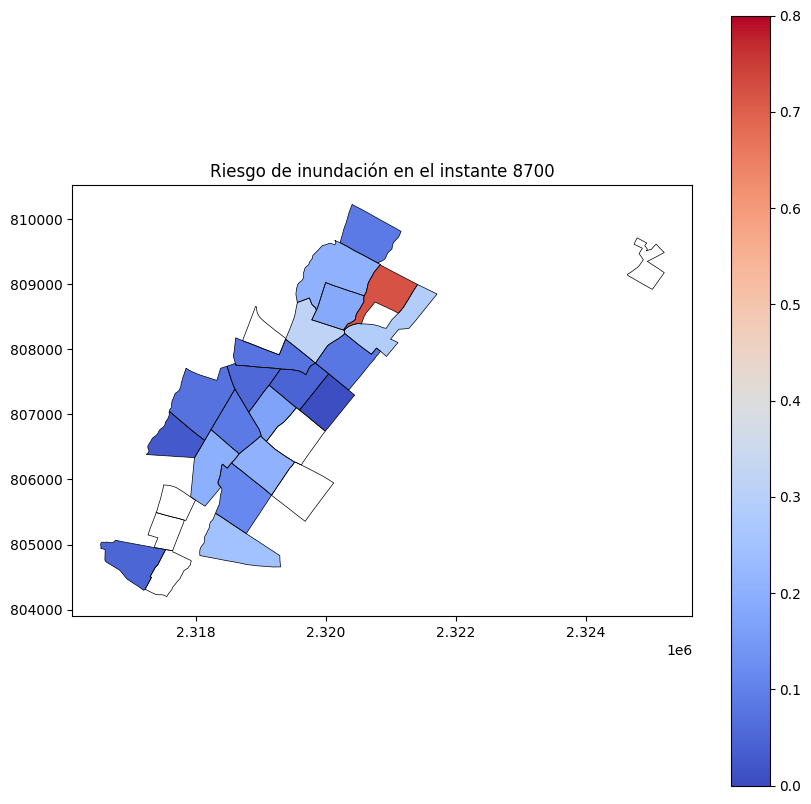

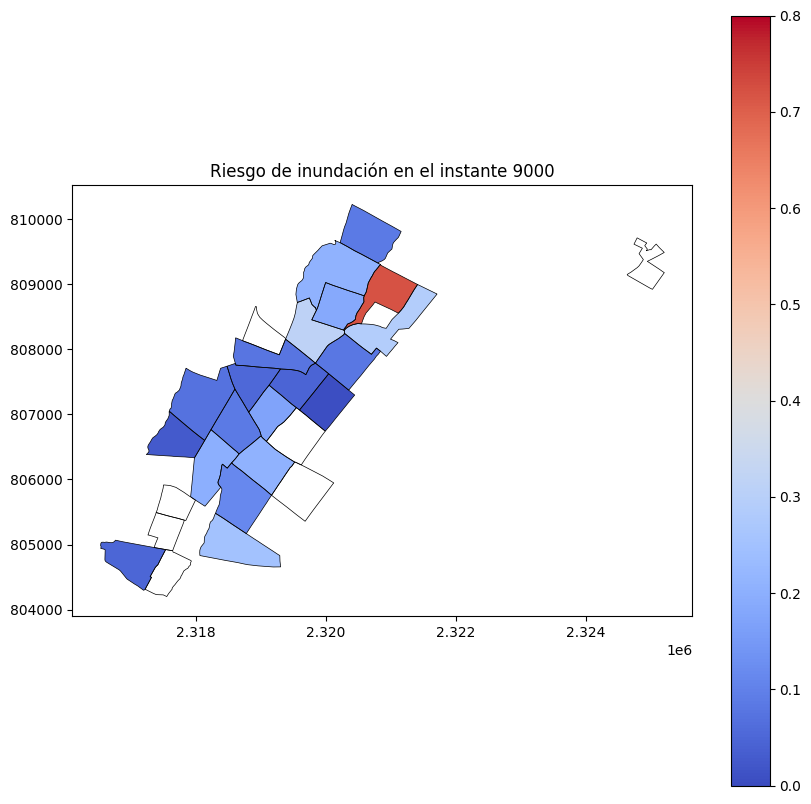

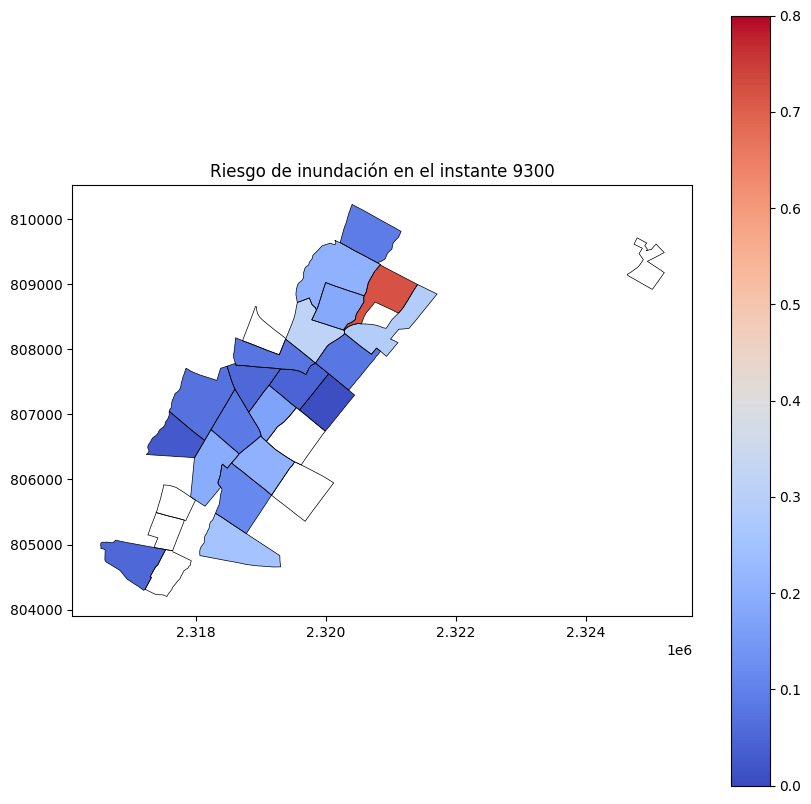

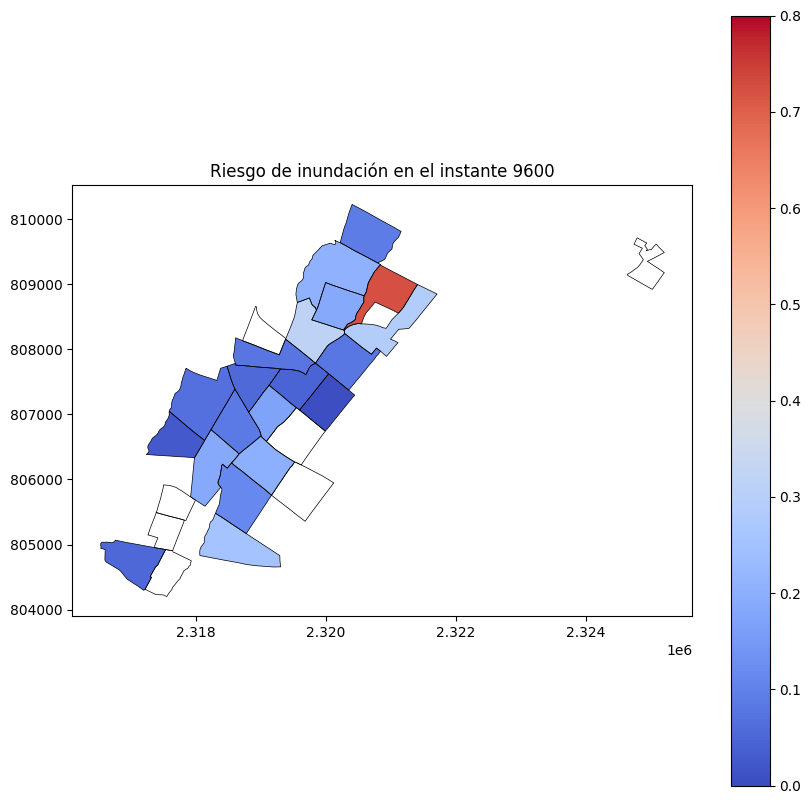

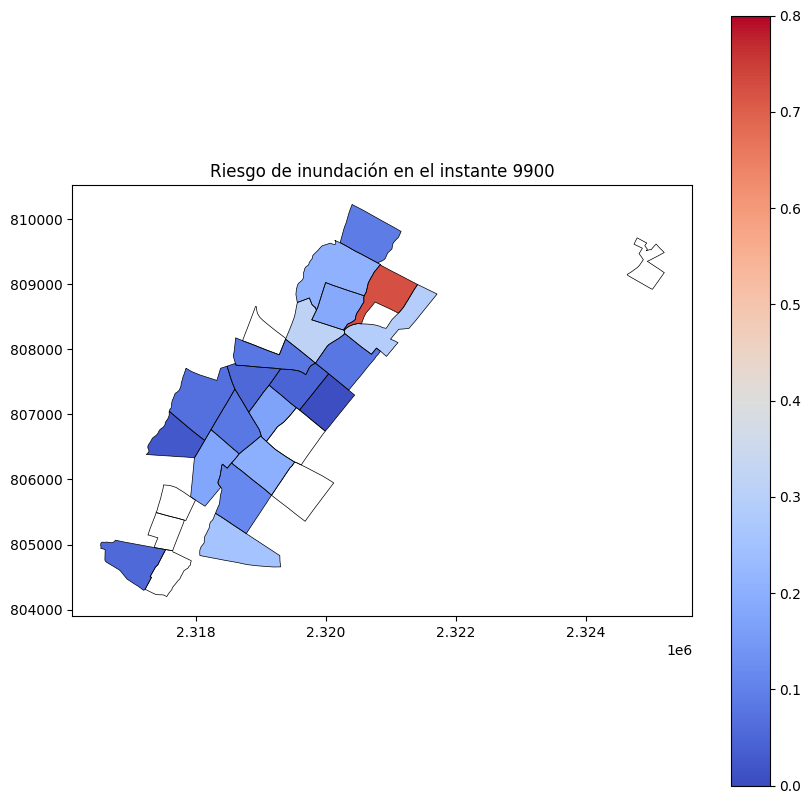

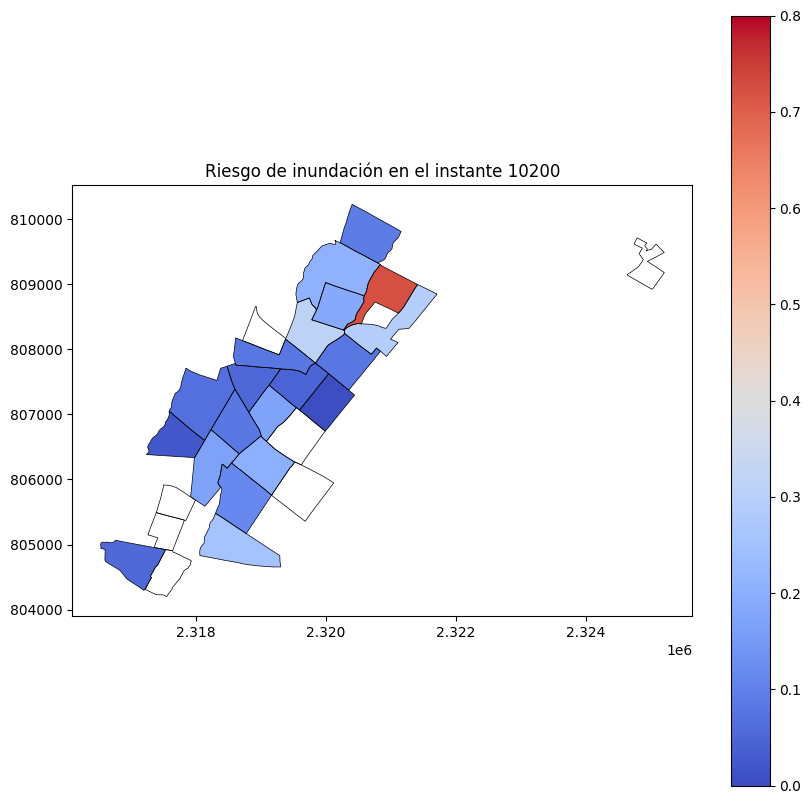

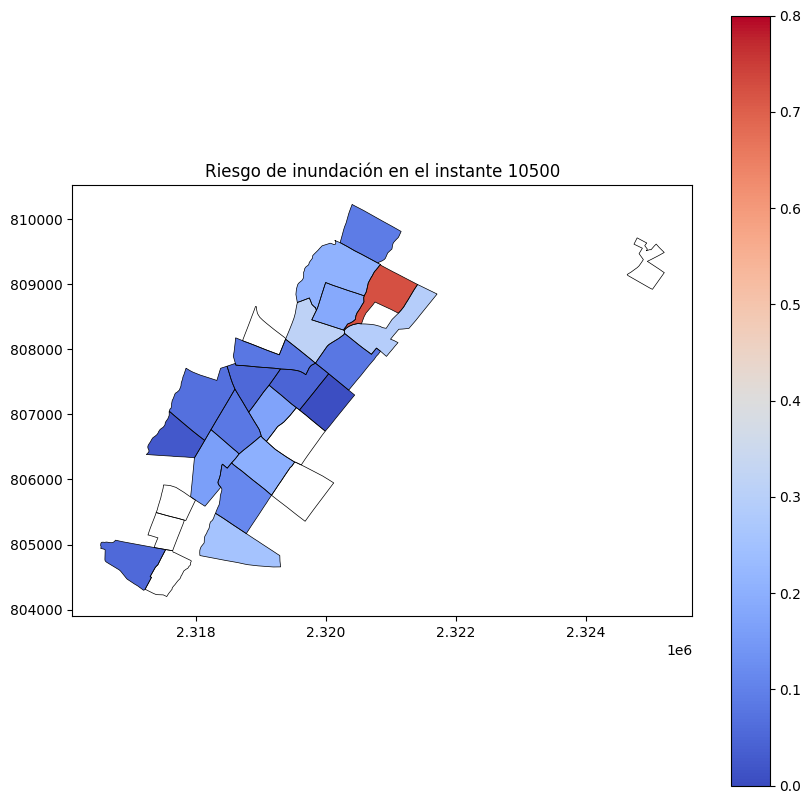

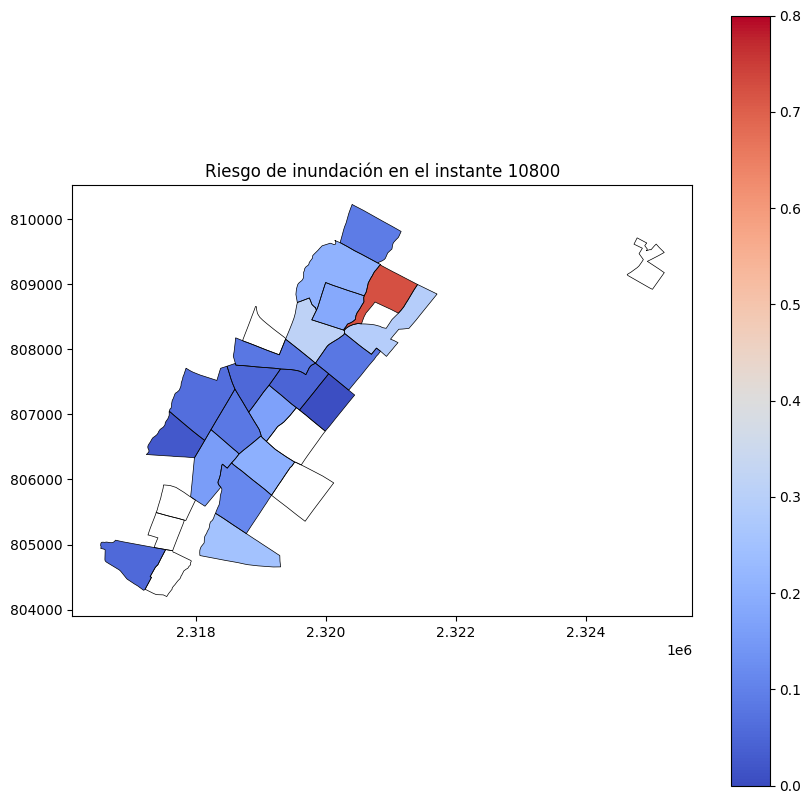

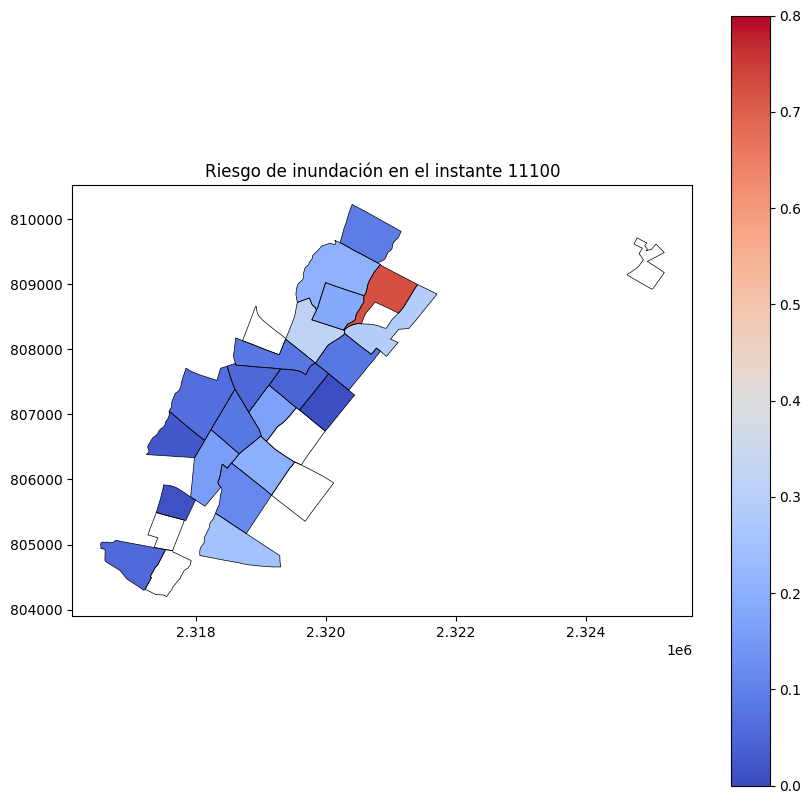

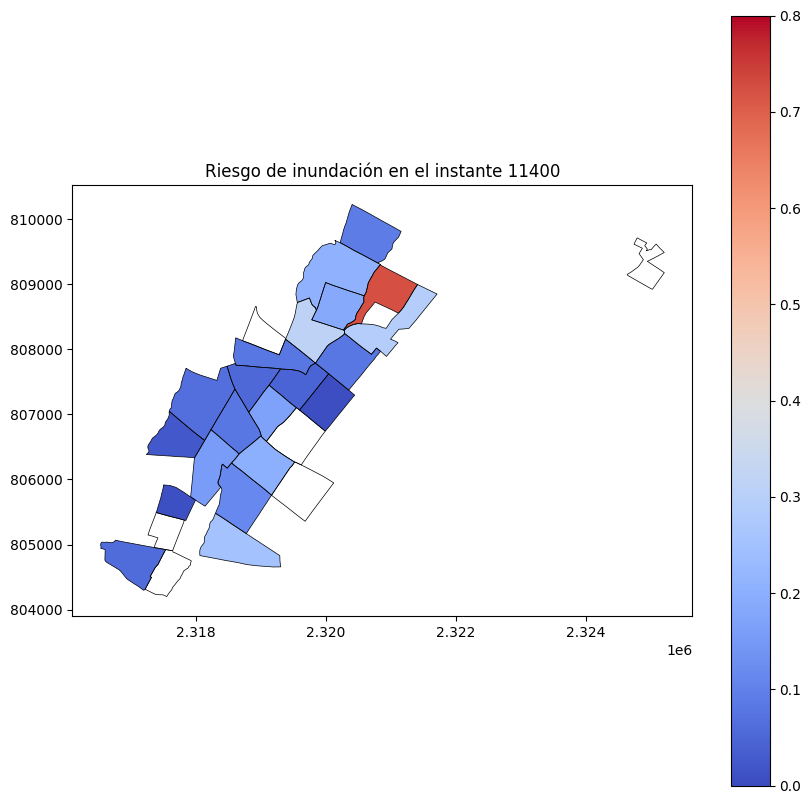

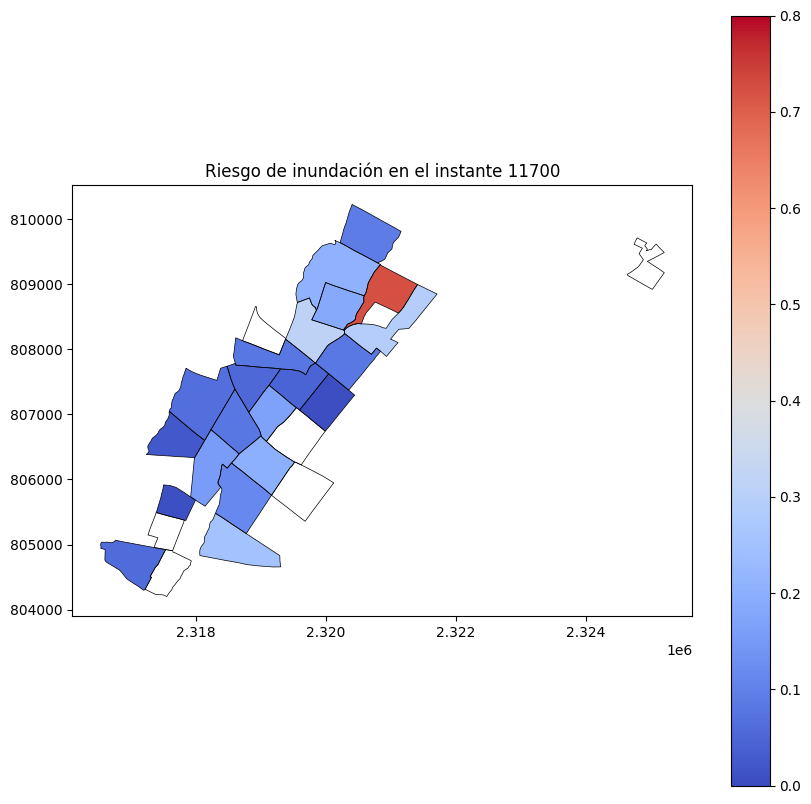

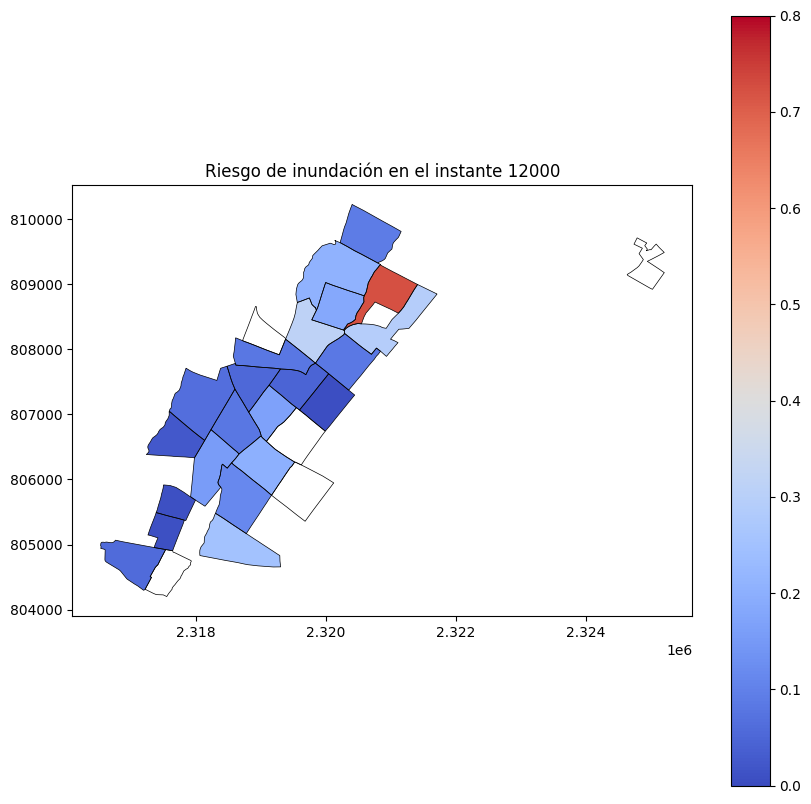

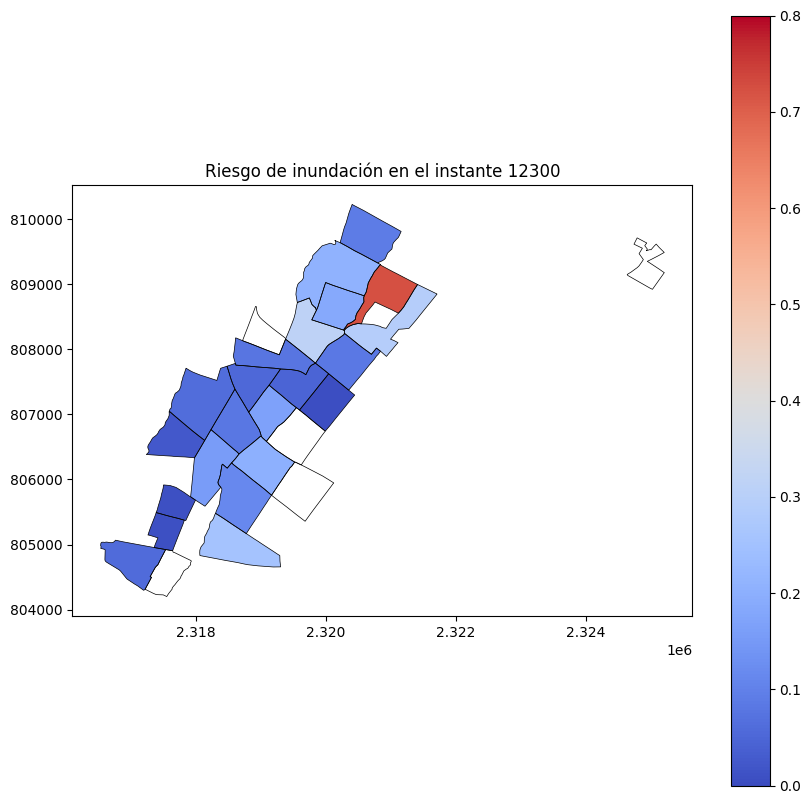

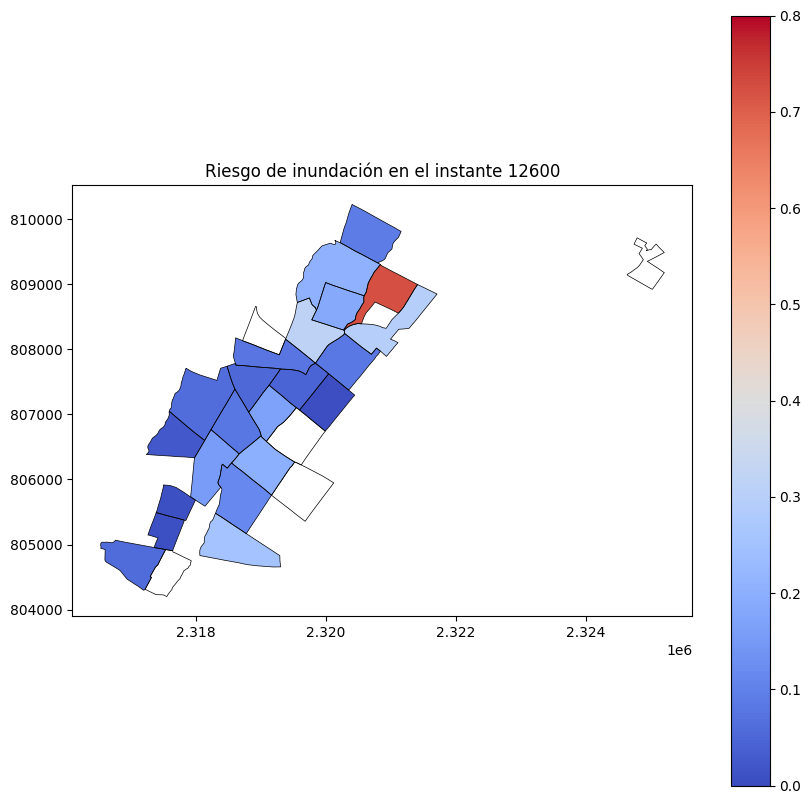

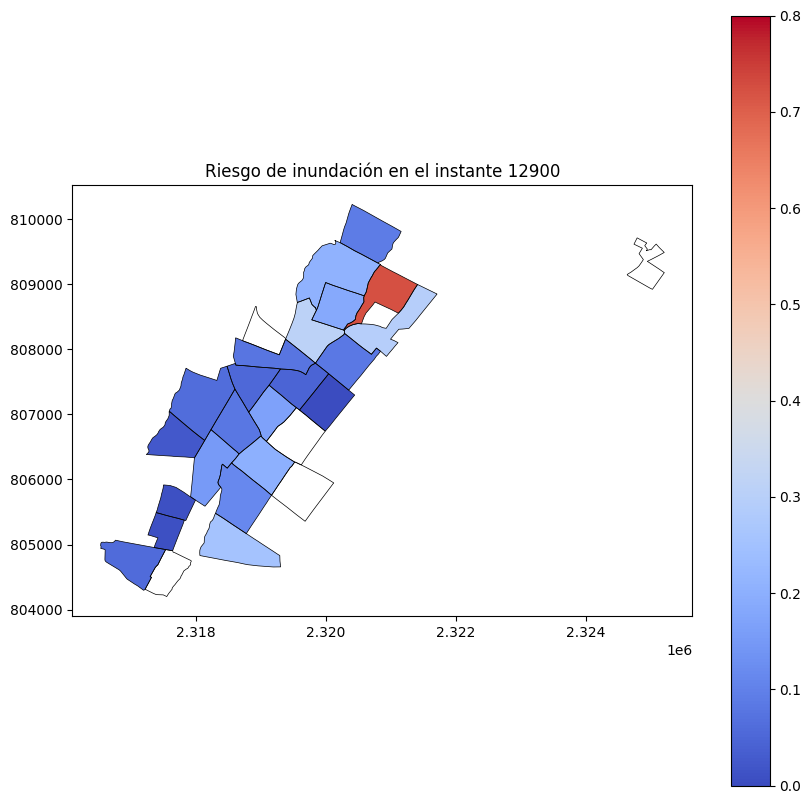

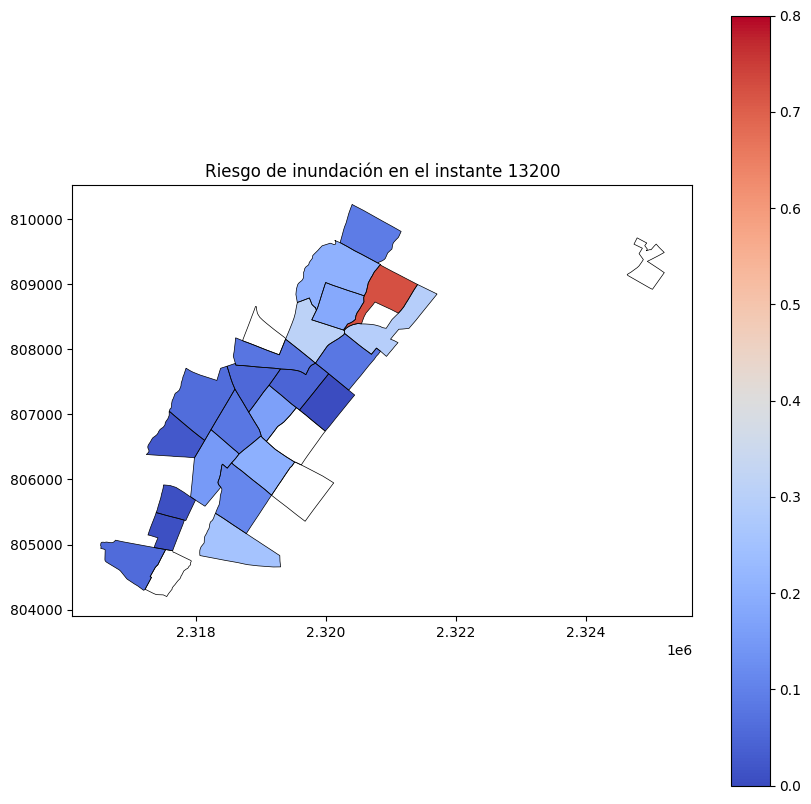

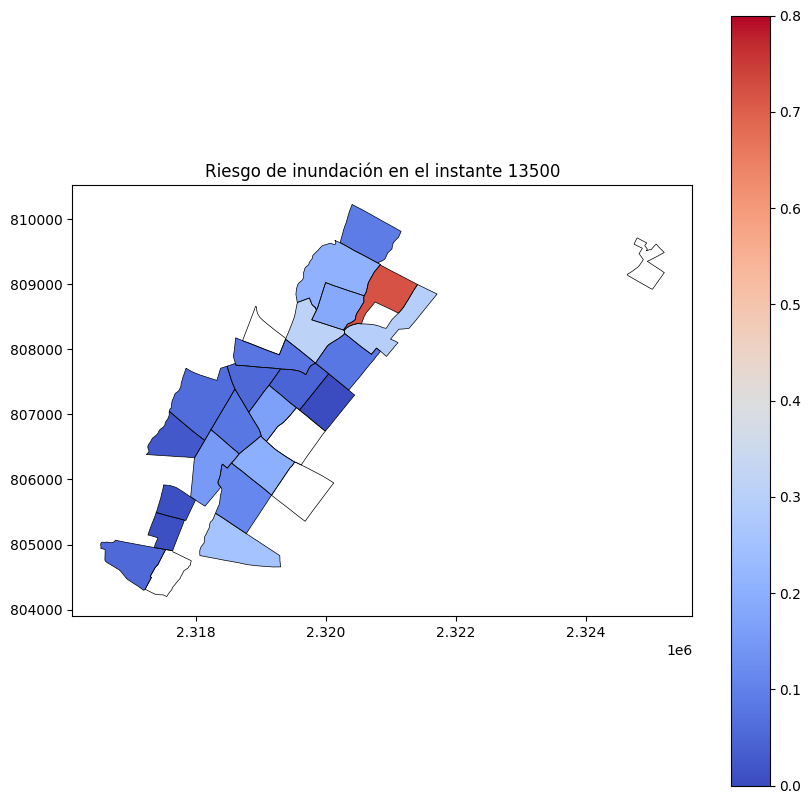

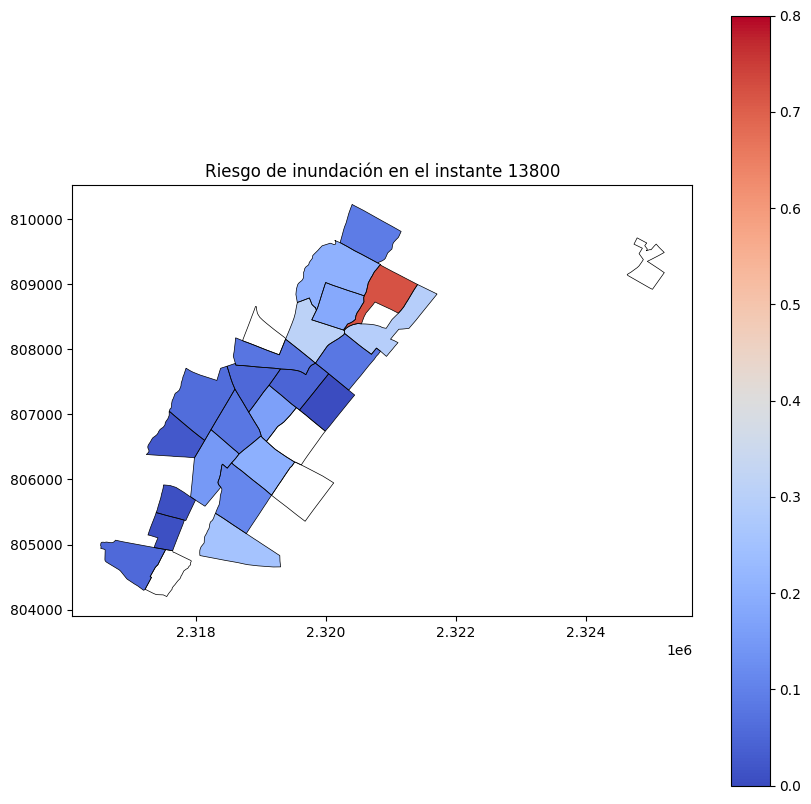

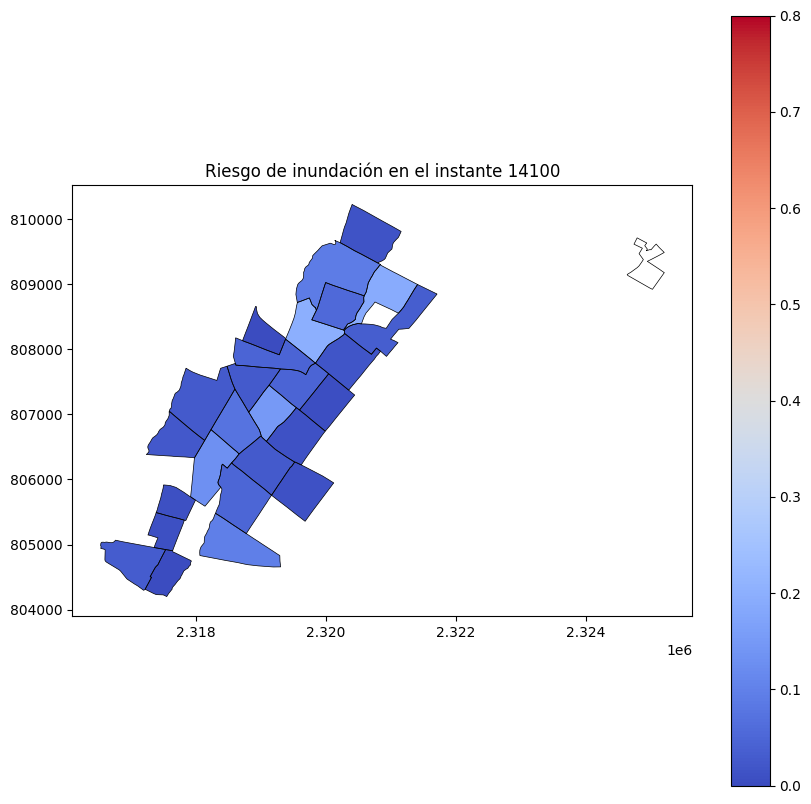

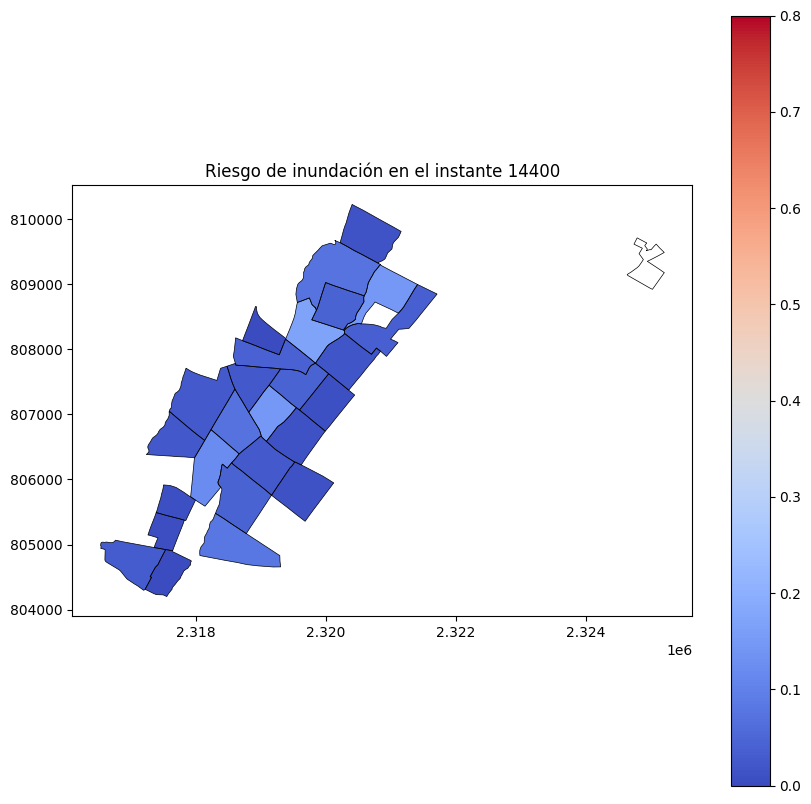

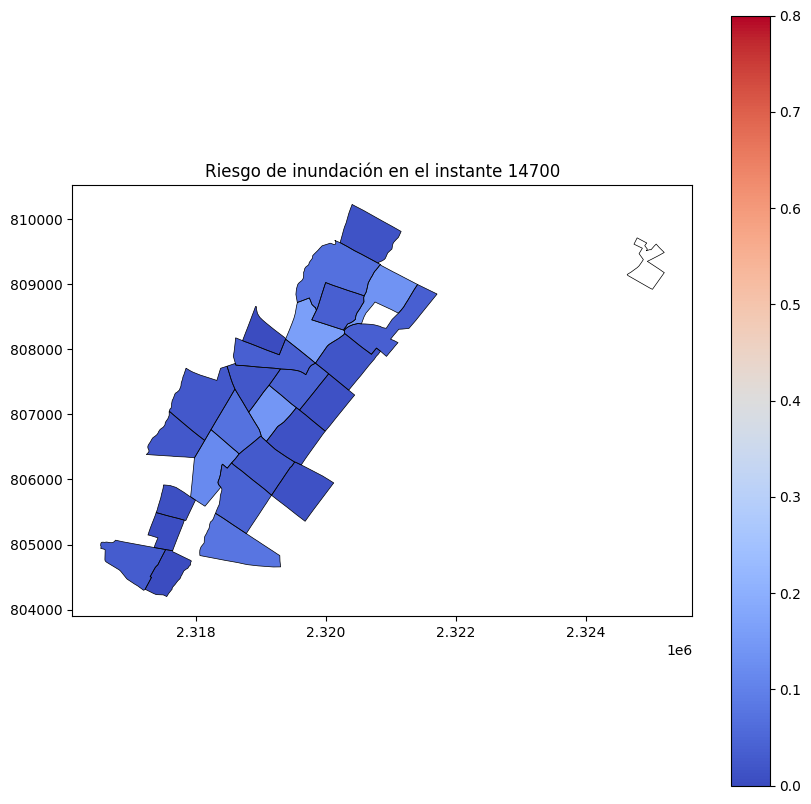

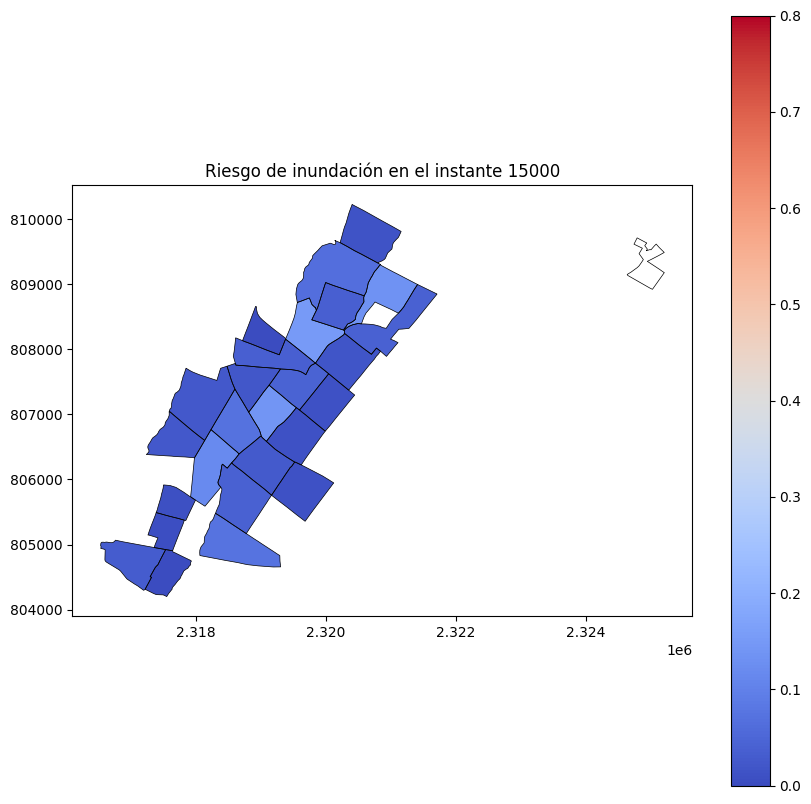

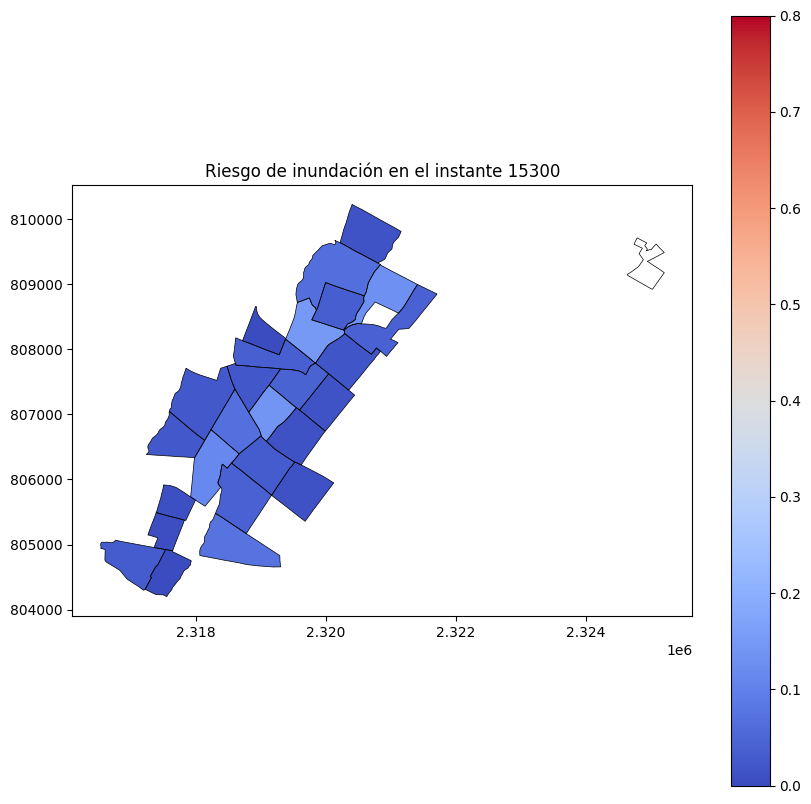

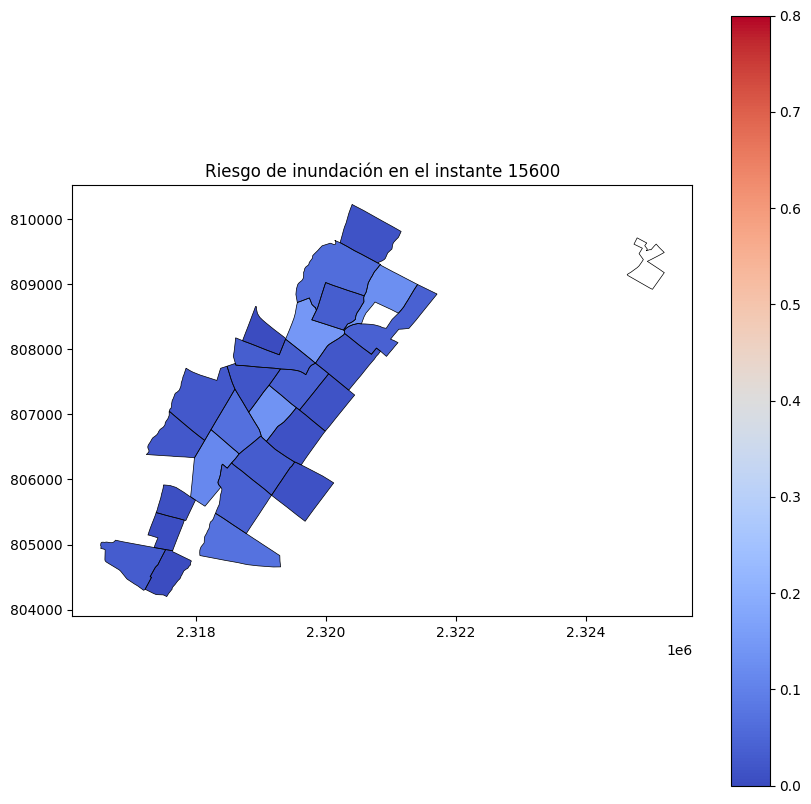

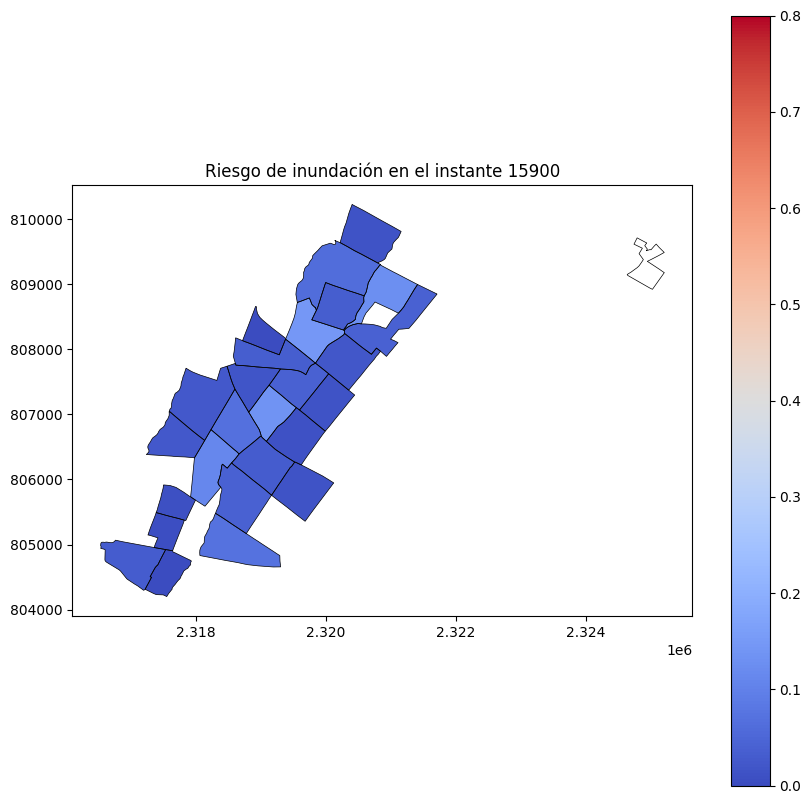

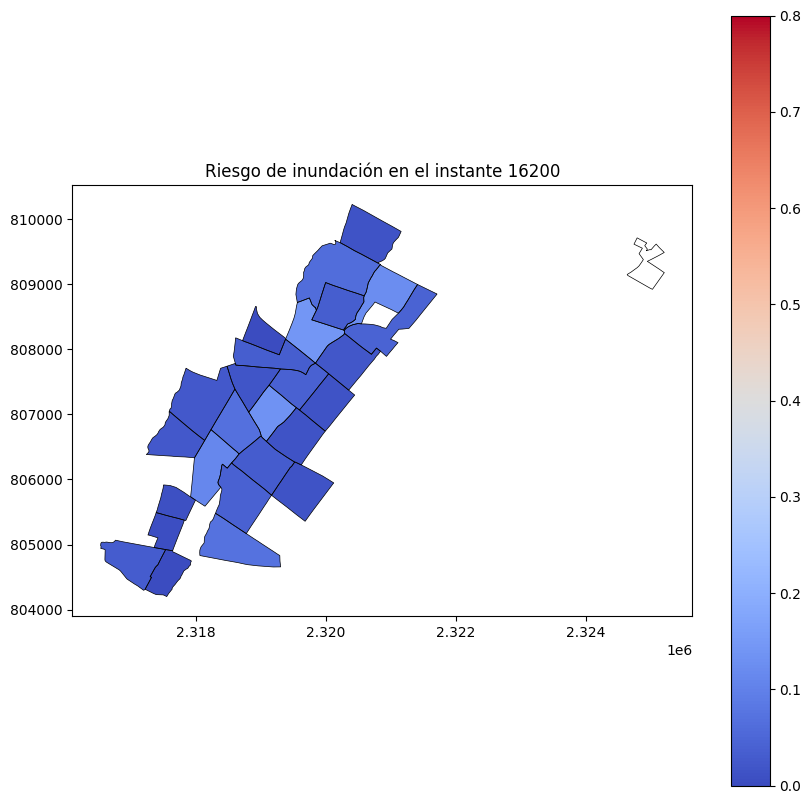

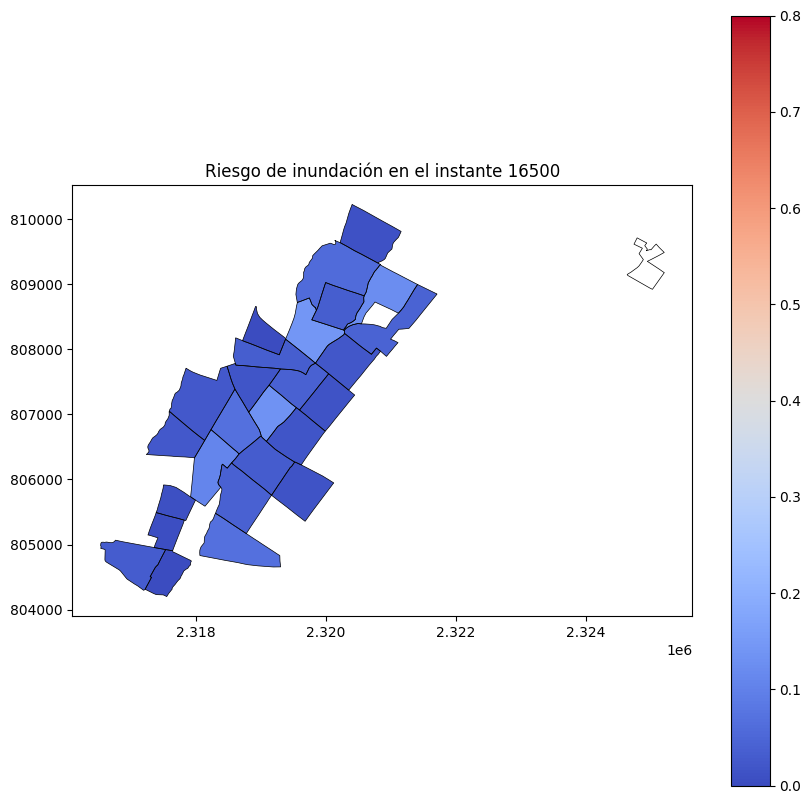

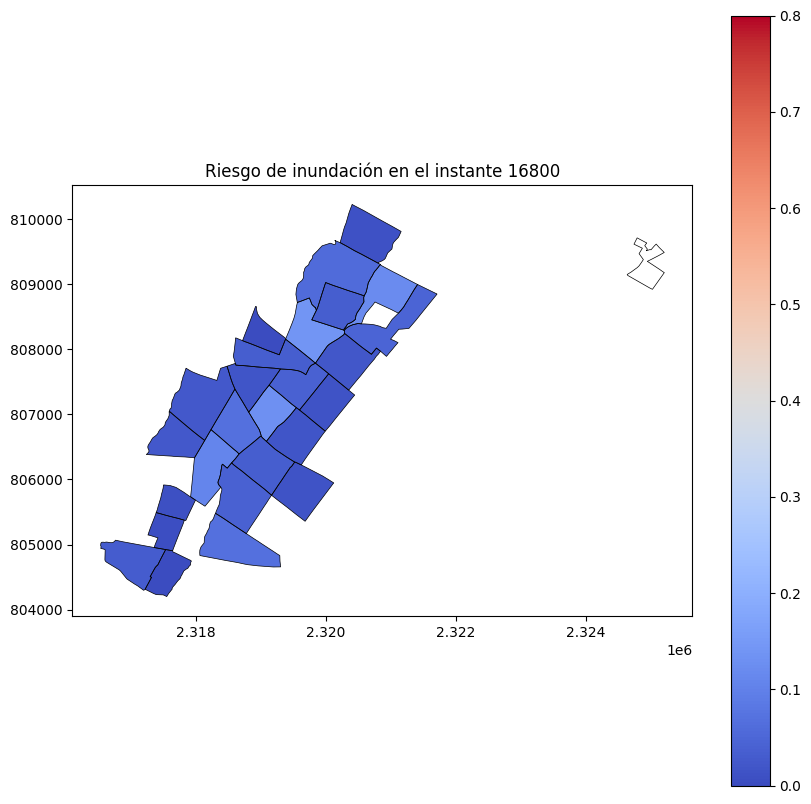

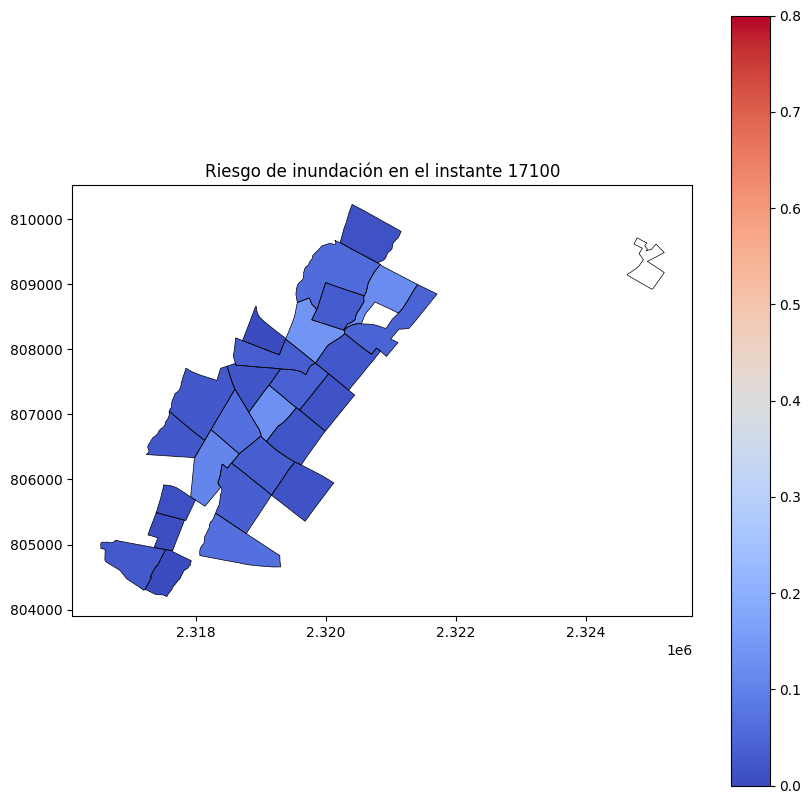

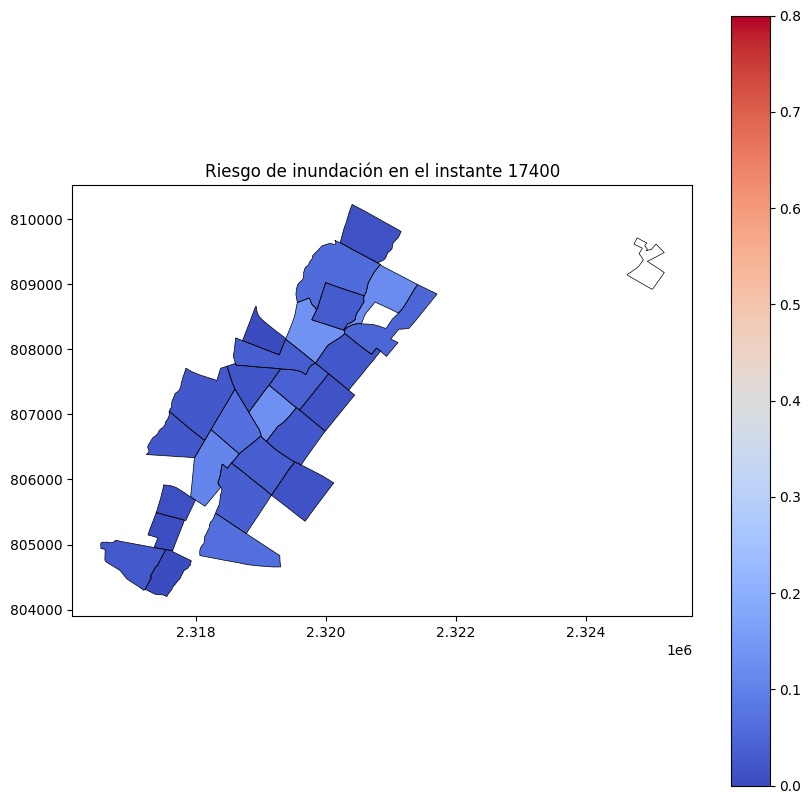

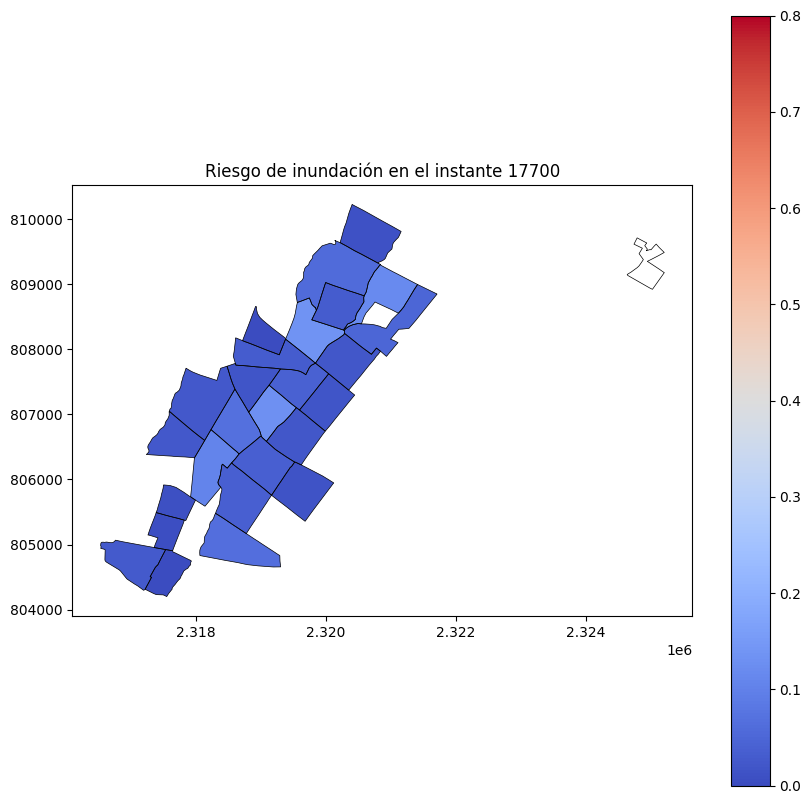

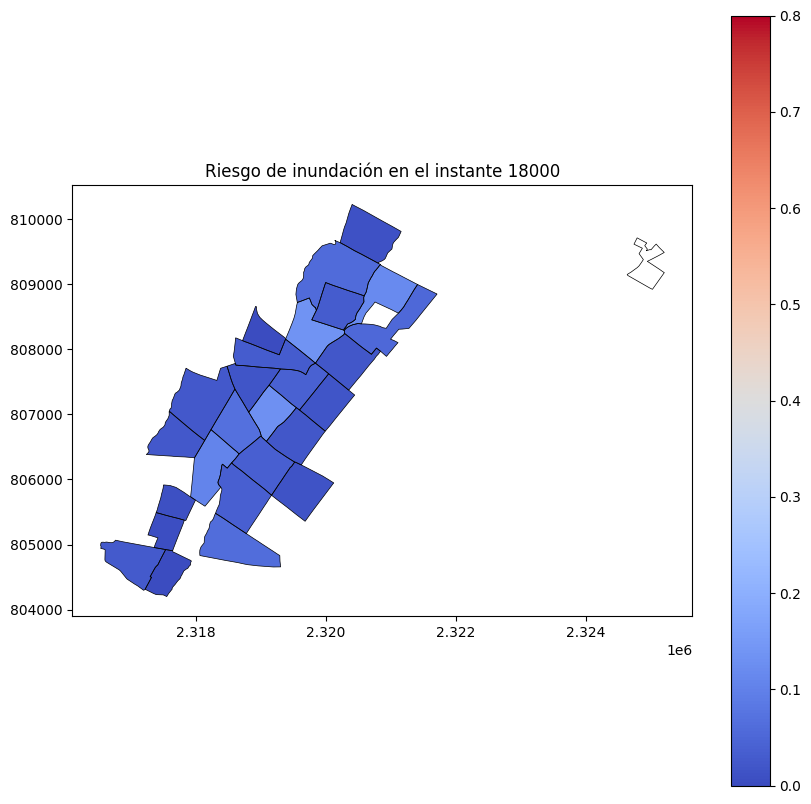

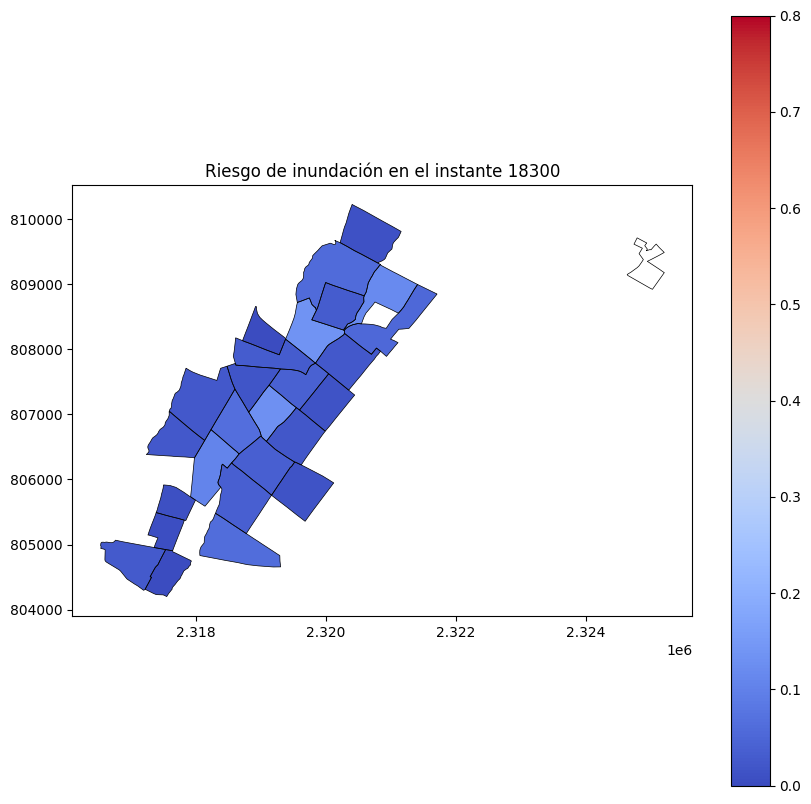

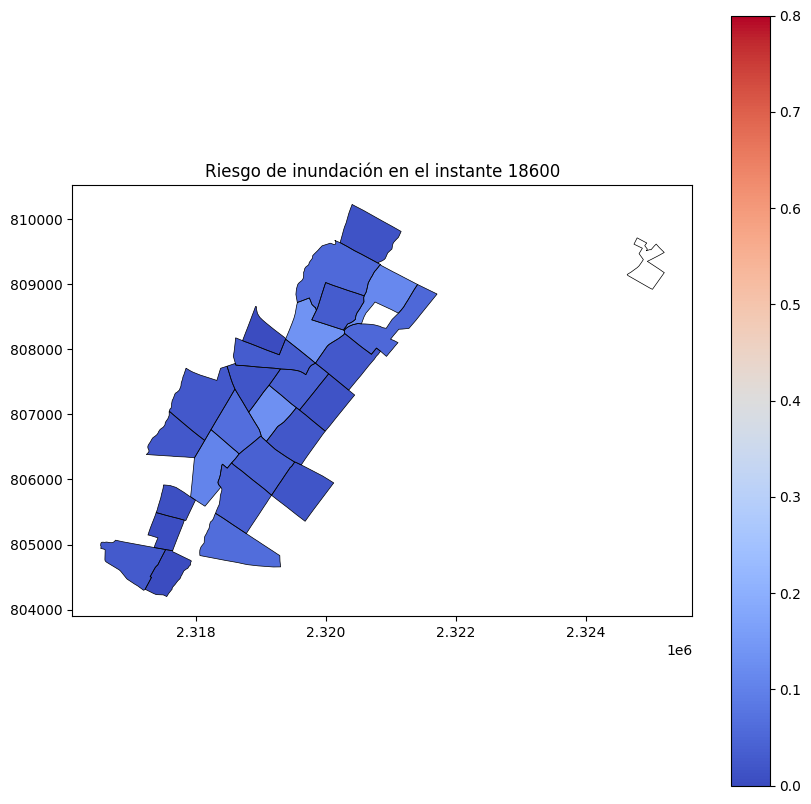

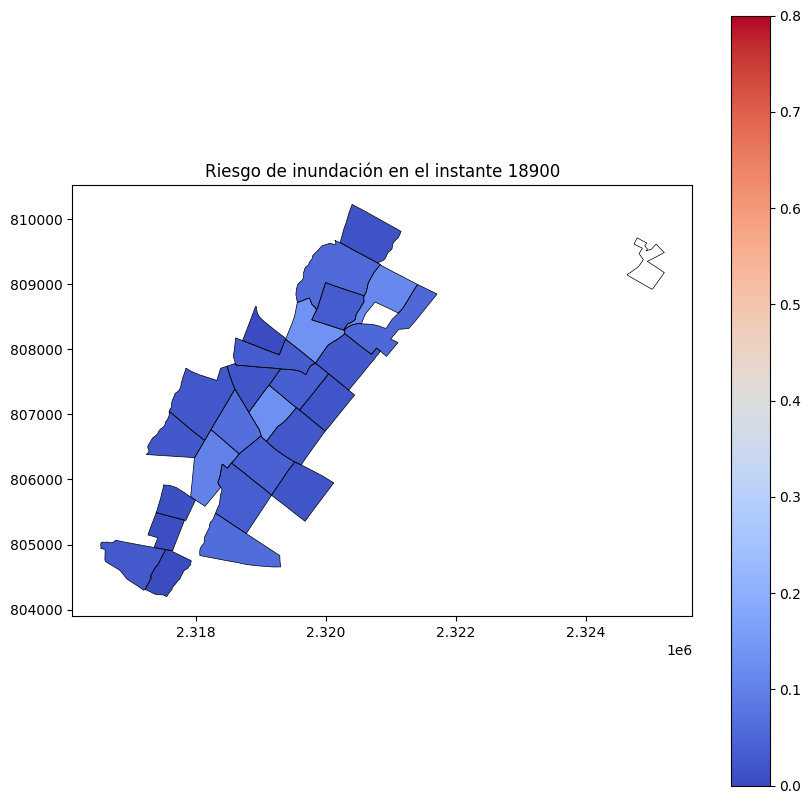

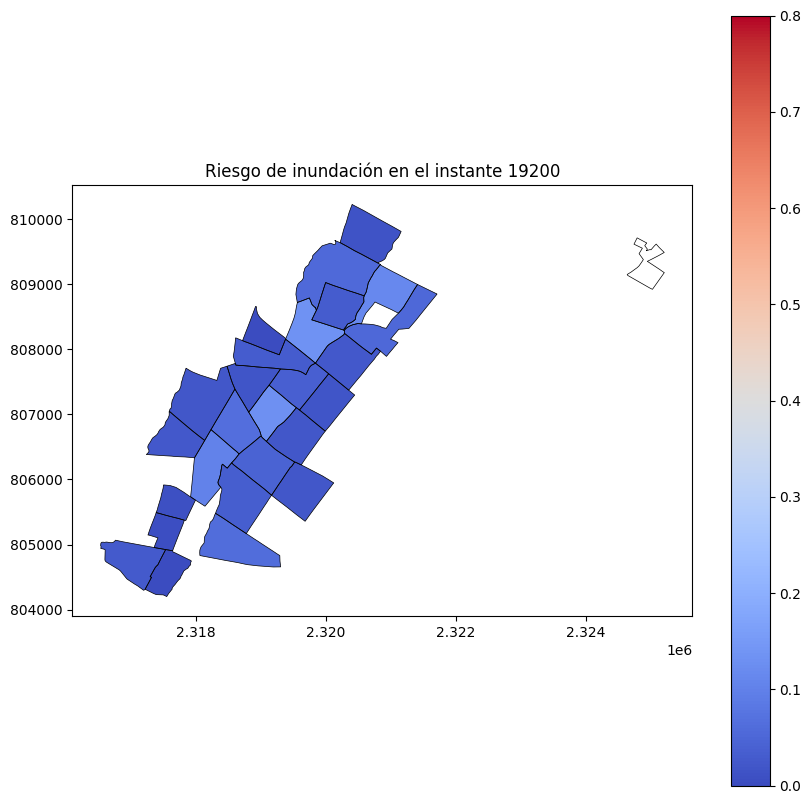

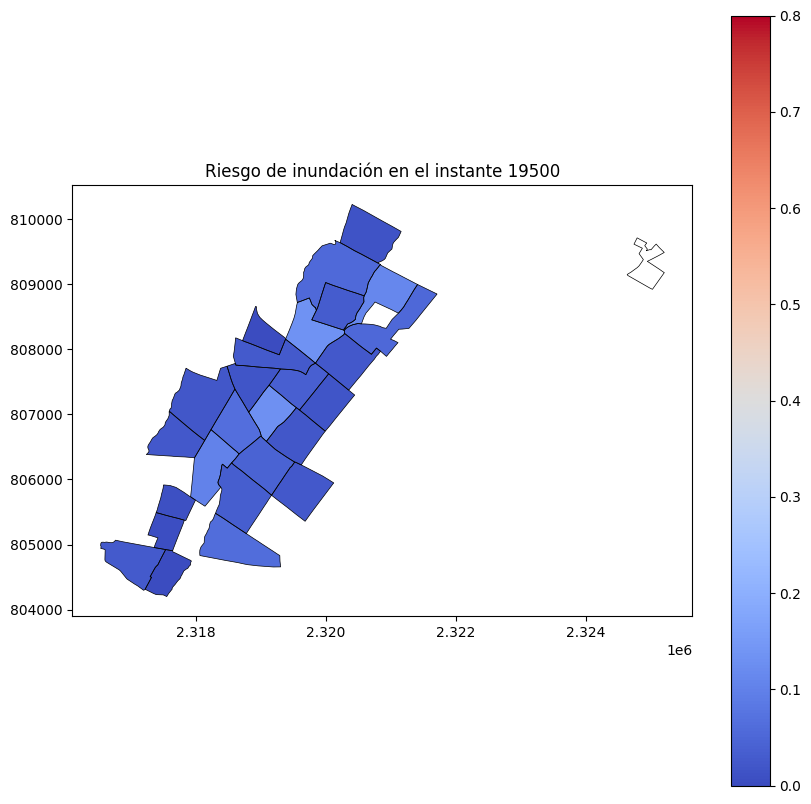

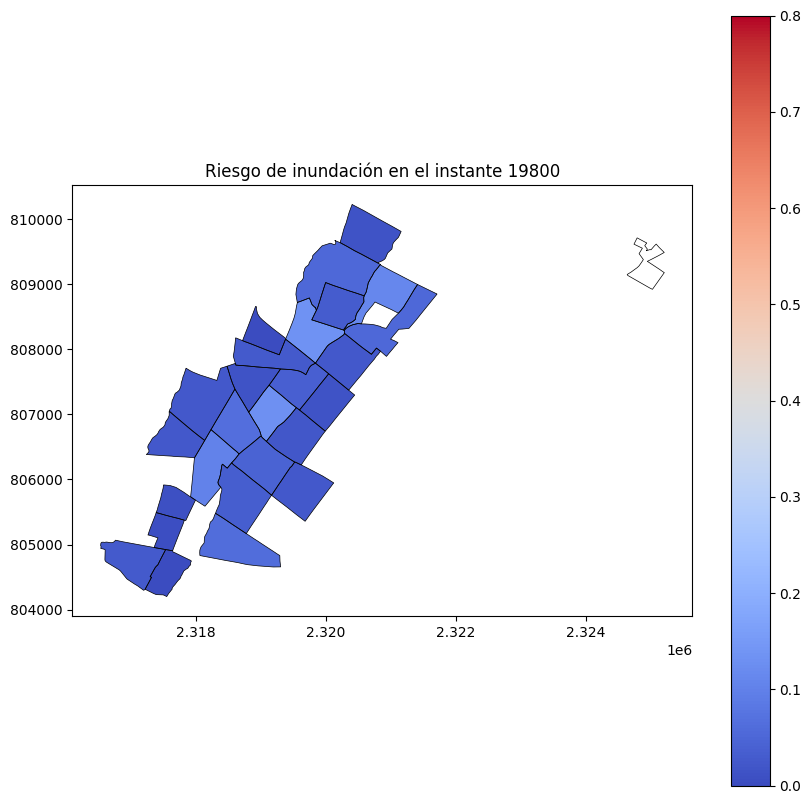

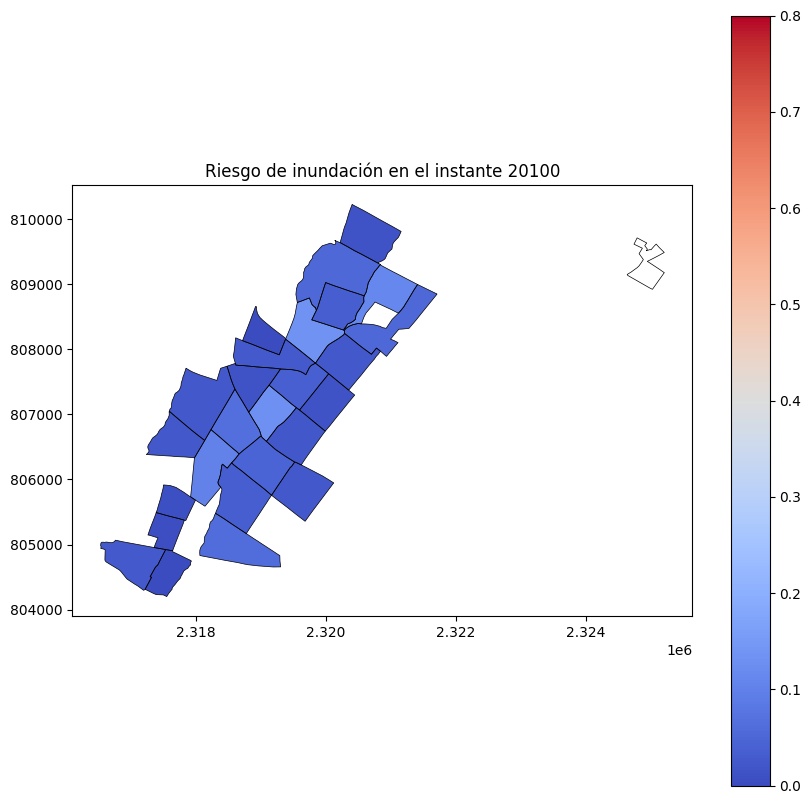

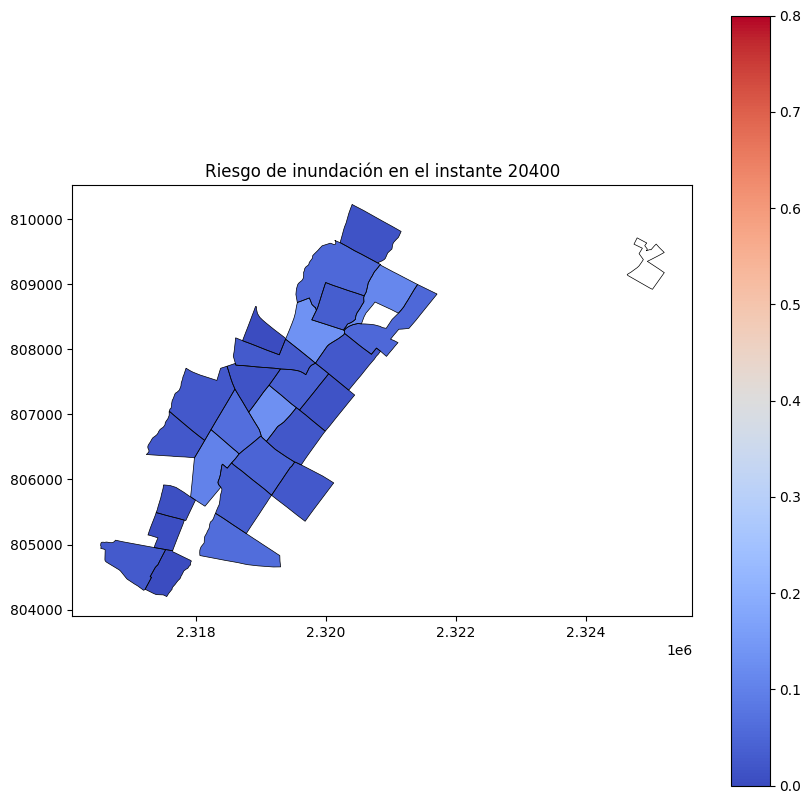

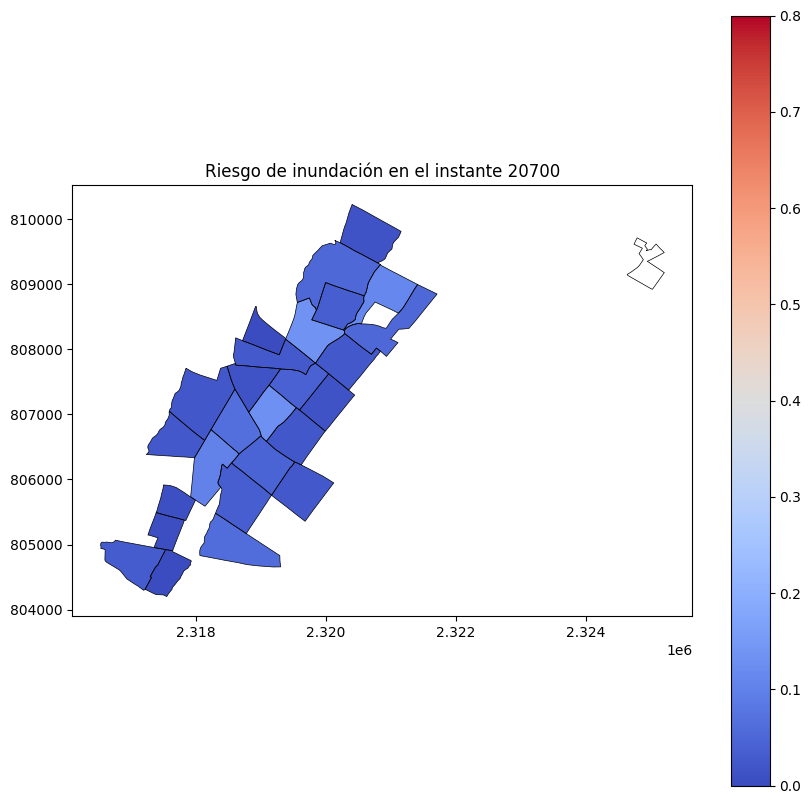

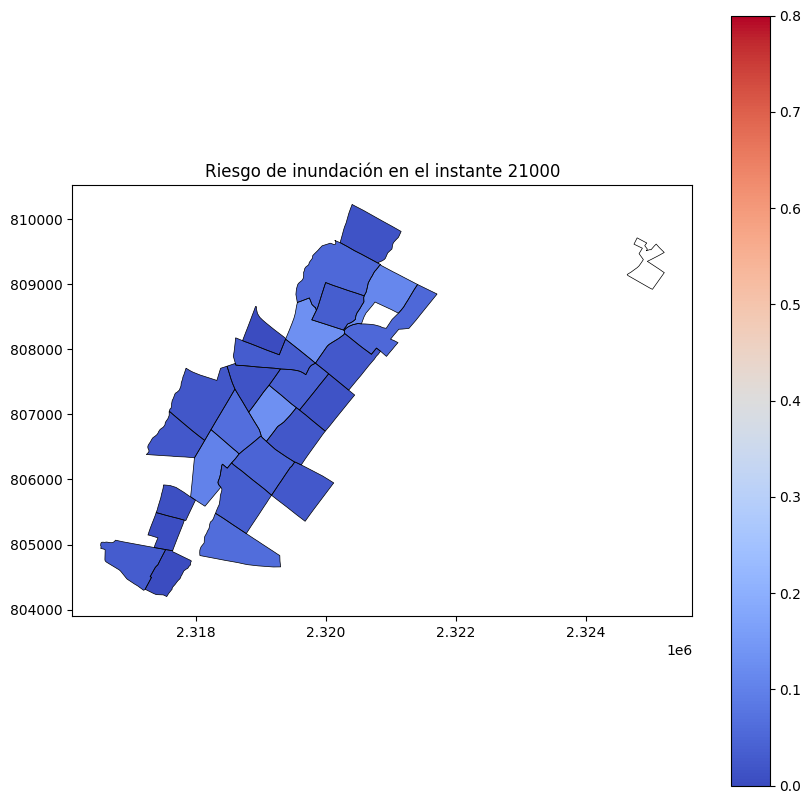

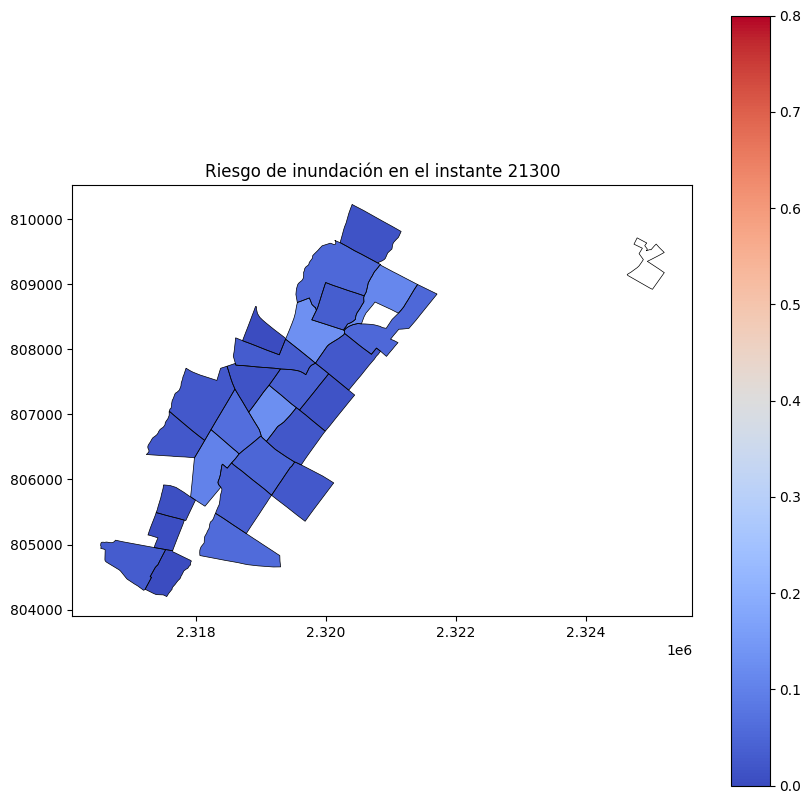

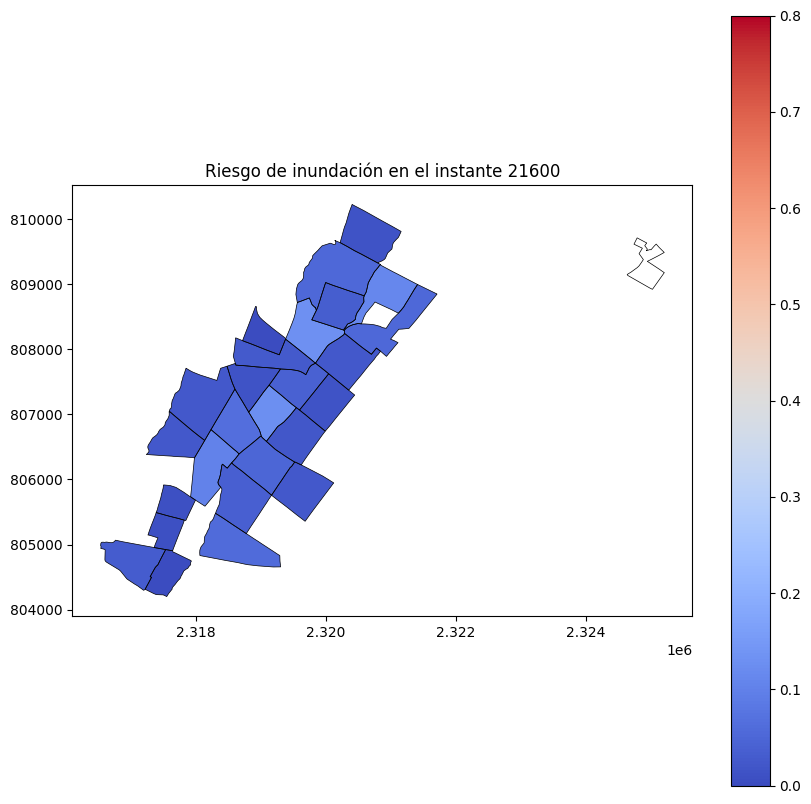

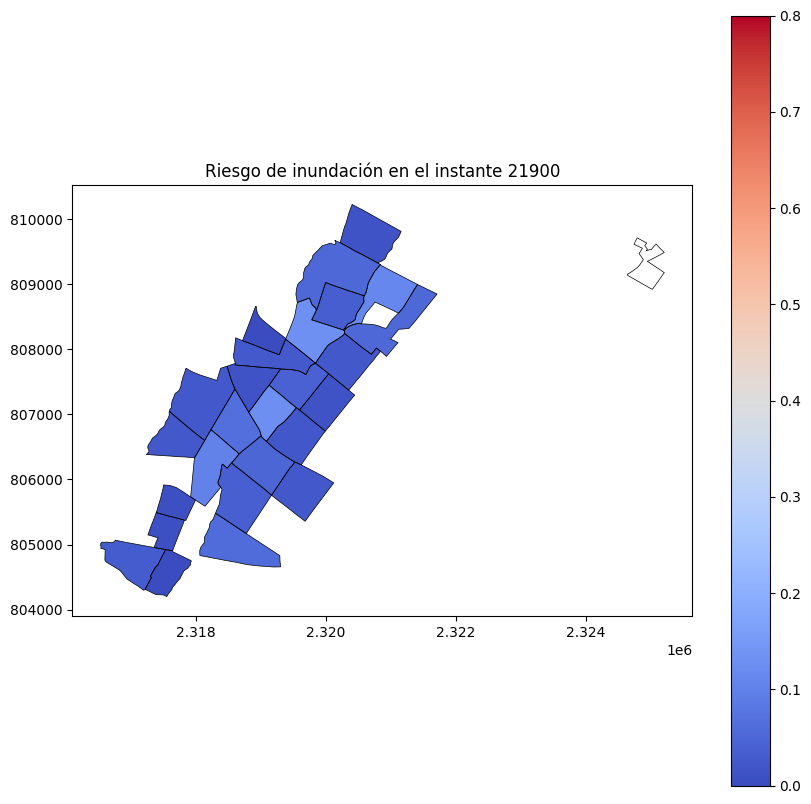

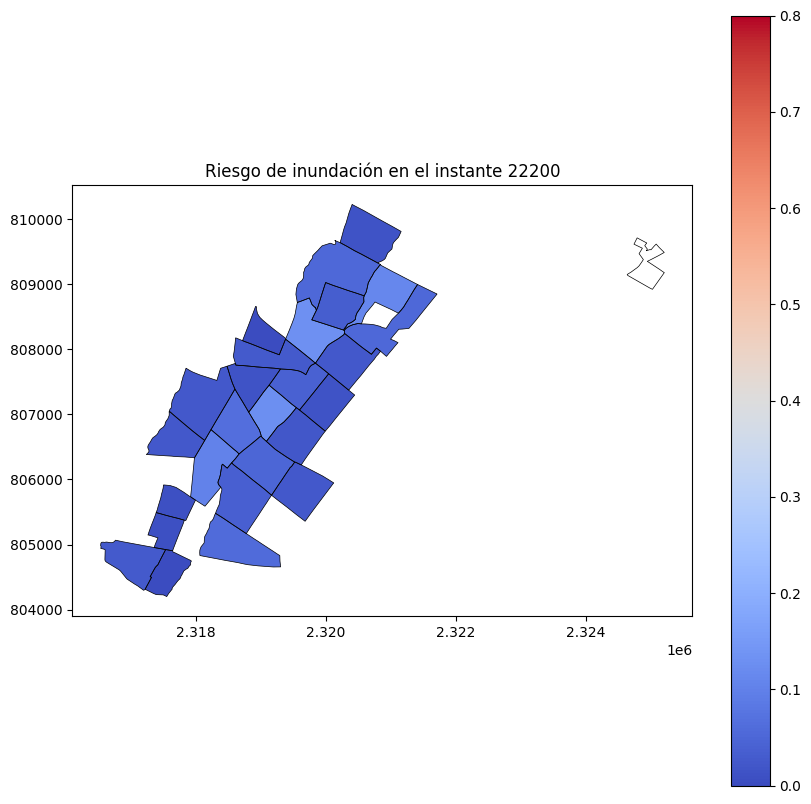

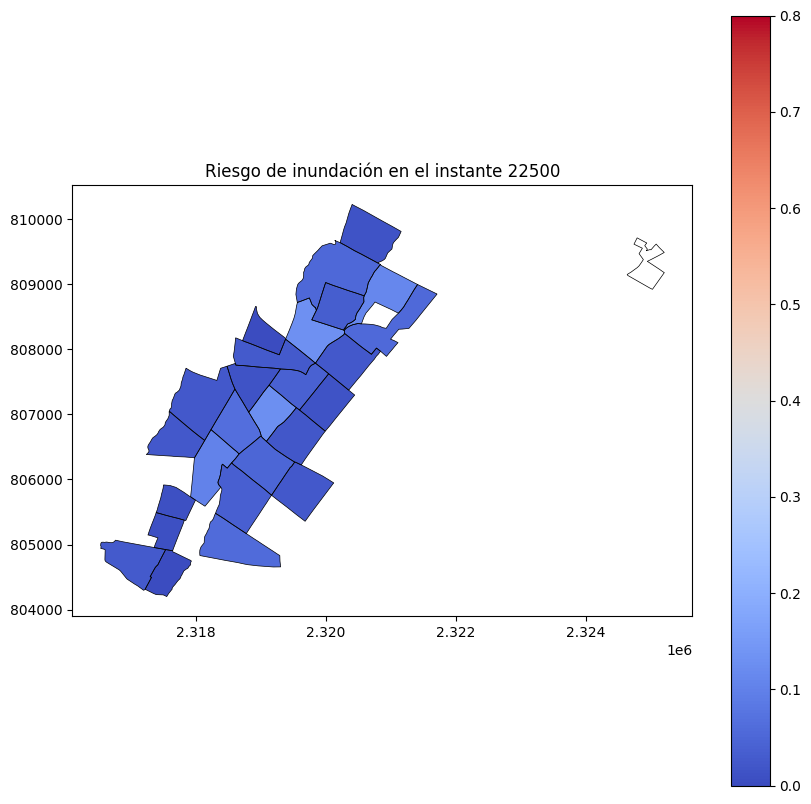

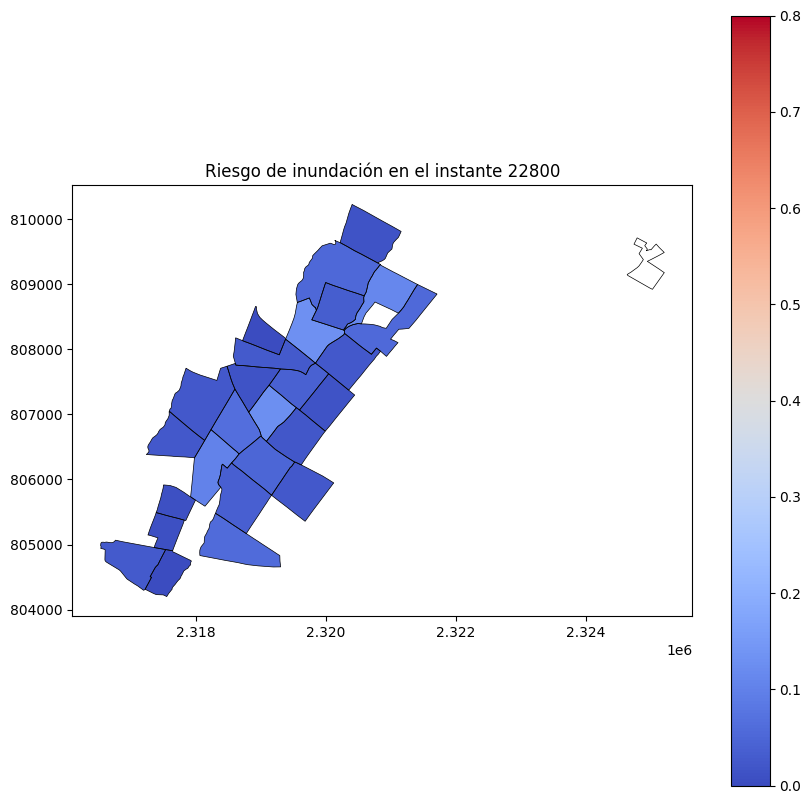

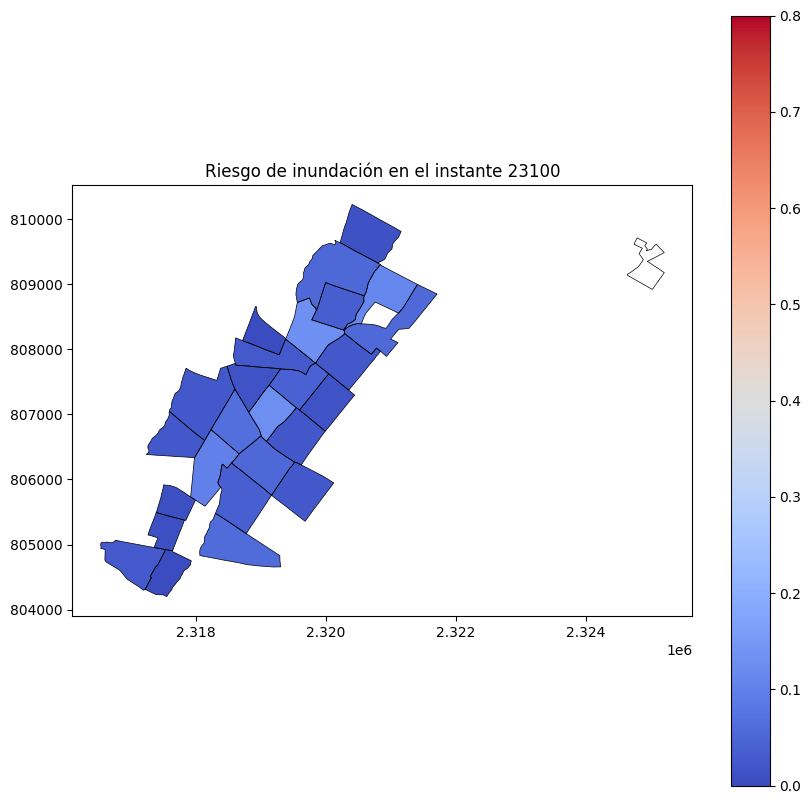

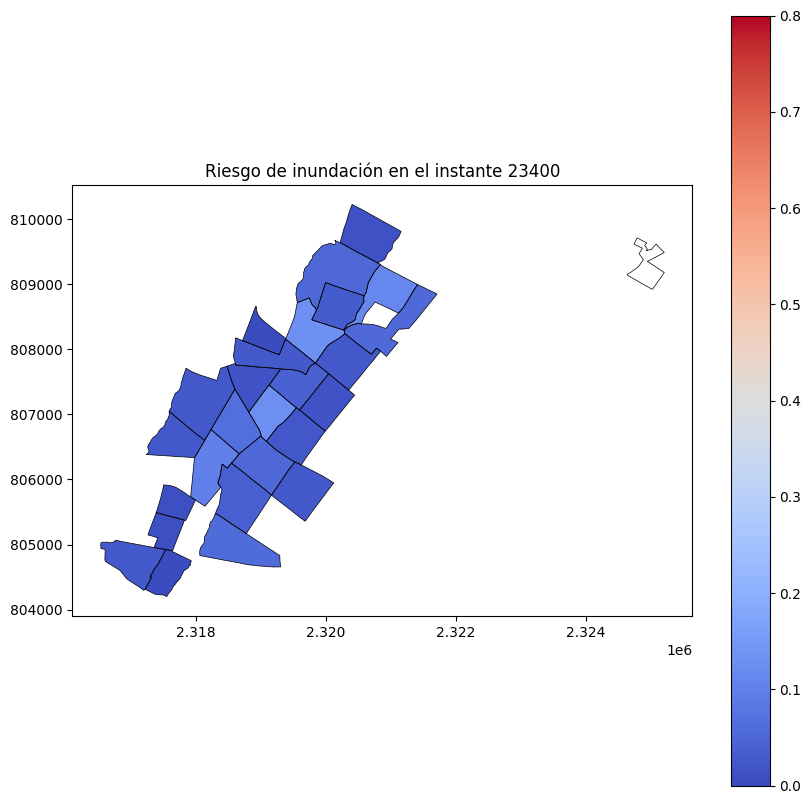

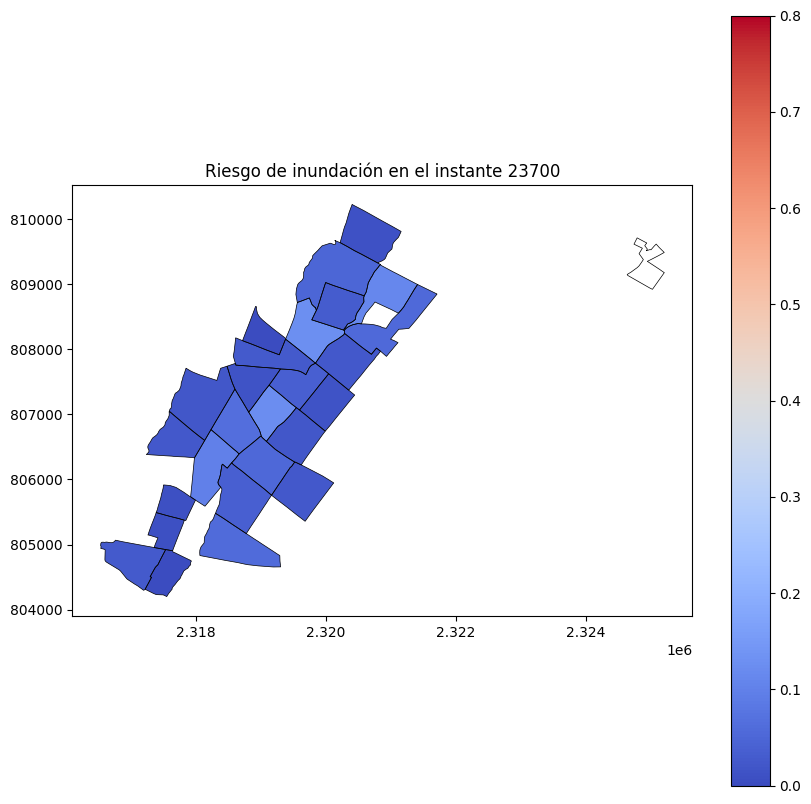

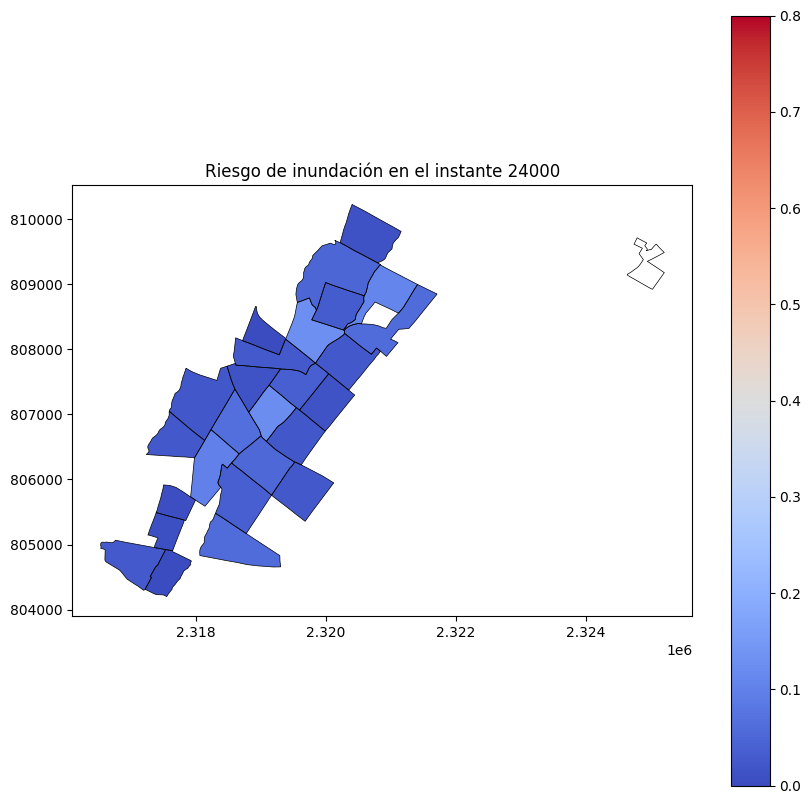

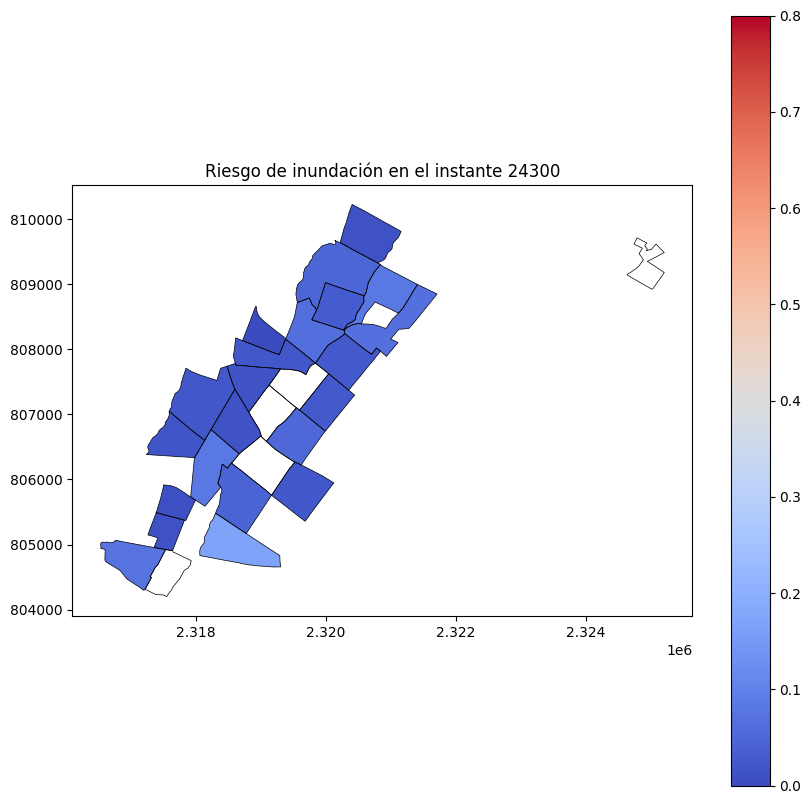

In [196]:
steps = df_proceso2["time"].unique()

for step in steps:
  plot_specific_time(step)